In [72]:
# Import libraries:
import pandas as pd
import importlib
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot
import reporting_module as bh_report
import mapping_dict_rad_xa as rad_xa_dict

# Make sure personal libraries are reloaded incase of adjustments:
importlib.reload(bh_utils)
importlib.reload(bh_map)
importlib.reload(bh_plot)
importlib.reload(bh_report)
importlib.reload(rad_xa_dict)

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'

# Import the data:
df_ids7 = pd.read_excel(path + 'IDS7 RRH XA.xlsx')
df_dt = pd.read_excel(path + 'DoseTrack RRH XA reduced.xlsx')

del path, hostname

# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)
# Get the mapping dictionary:
mapping_dict = rad_xa_dict.get_rad_xa_mapping_dict()
# First we perform mapping on selected procedures:
data = bh_map.map_procedures(data, mapping_dict, True)

del df_dt, df_ids7, mapping_dict

Number of rows with NaT in the column "Bestilt dato og tidspunkt": 1
Number of cancelled procedures: 419
Number of non-human subjects: 8
Number of rows with invalid accession number: 0
Number of accession numbers in IDS7: 2371
Number of accession numbers in IDS7 not in DoseTrack: 142
Inserted accession number: NRRH000008244732 for patient: PAS0246, time: 2023-05-18 13:00:00, accession numbers: ['NRRH000008244732' 'NRRH000008244733']
Inserted accession number: NRRH000007967678 for patient: PAS1308, time: 2023-01-03 07:00:00, accession numbers: ['NRRH000007967670' 'NRRH000007967678']
The accession numbers have been changed. Running check_accession_ids7_vs_dt
Number of accession numbers in IDS7: 2369
Number of accession numbers in IDS7 not in DoseTrack: 140
Number of accession numbers in DoseTrack: 2490
Number of accession numbers in DoseTrack not in IDS7: 261
This column will not be included in the merged data.


The IDS7 and DoseTrack has merged data of length: 2229
Mapping procedures..

In [ ]:
unmapped = data[data['Mapped Procedures'] == 'Unmapped']

Reporting doses for Abdomen/Bekken/Aorta PTA/Embolisering/Stent/Stentgraft:


Alle: n =   64, DAP: Median - 75.1, IQR [36.1 - 161.2] (Gy*cm2), Range (5.2 - 545.6).


IRH_XA7: n =    3, DAP: Median - 19.6, IQR [13.7 - 22.7] (Gy*cm2), Range (7.8 - 25.8).
RRH_XA1: n =   49, DAP: Median - 83.3, IQR [46.0 - 177.8] (Gy*cm2), Range (8.3 - 545.6).
RRH_XA4: n =   12, DAP: Median - 43.3, IQR [25.0 - 83.6] (Gy*cm2), Range (5.2 - 223.6).
--------------------------------------------------


Reporting doses for Caput Embolisering:


Alle: n =   70, DAP: Median - 132.7, IQR [90.7 - 195.7] (Gy*cm2), Range (27.4 - 1189.5).


RRH_XA2: n =   69, DAP: Median - 132.4, IQR [90.5 - 189.4] (Gy*cm2), Range (27.4 - 1189.5).
RRH_XA4: n =    1, DAP: Median - 214.0, IQR [214.0 - 214.0] (Gy*cm2), Range (214.0 - 214.0).
--------------------------------------------------


Reporting doses for Caput og collum:


Alle: n =  181, DAP: Median - 89.7, IQR [42.4 - 140.3] (Gy*cm2), Range (1.3 - 480.5).


RRH_XA2: n =  149, 

c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  data = data.sort_values(by=['Modality Room'])


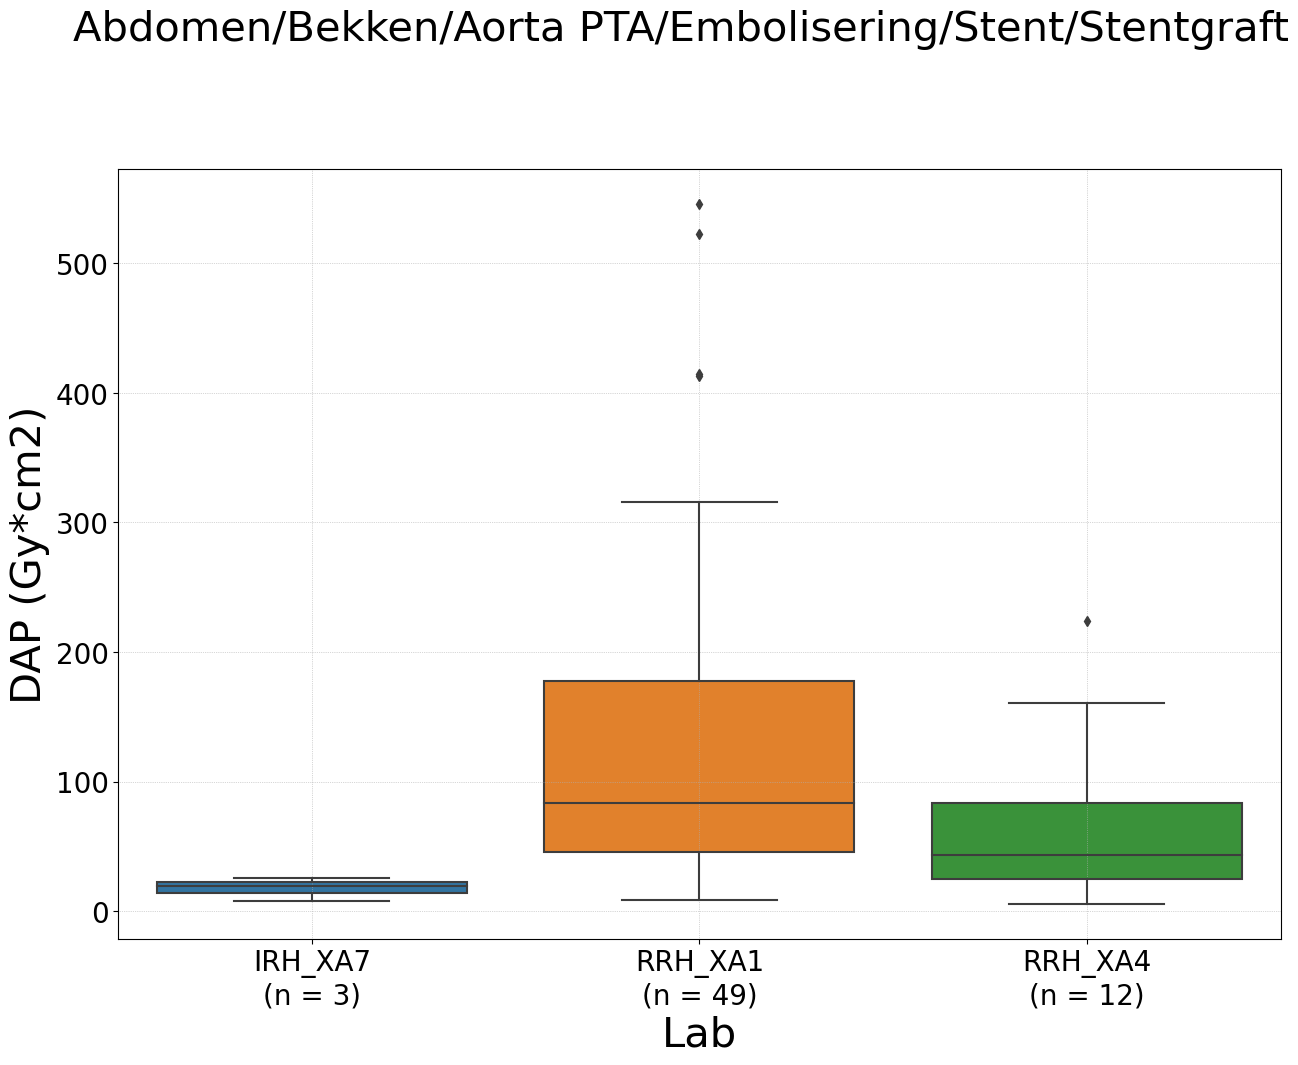

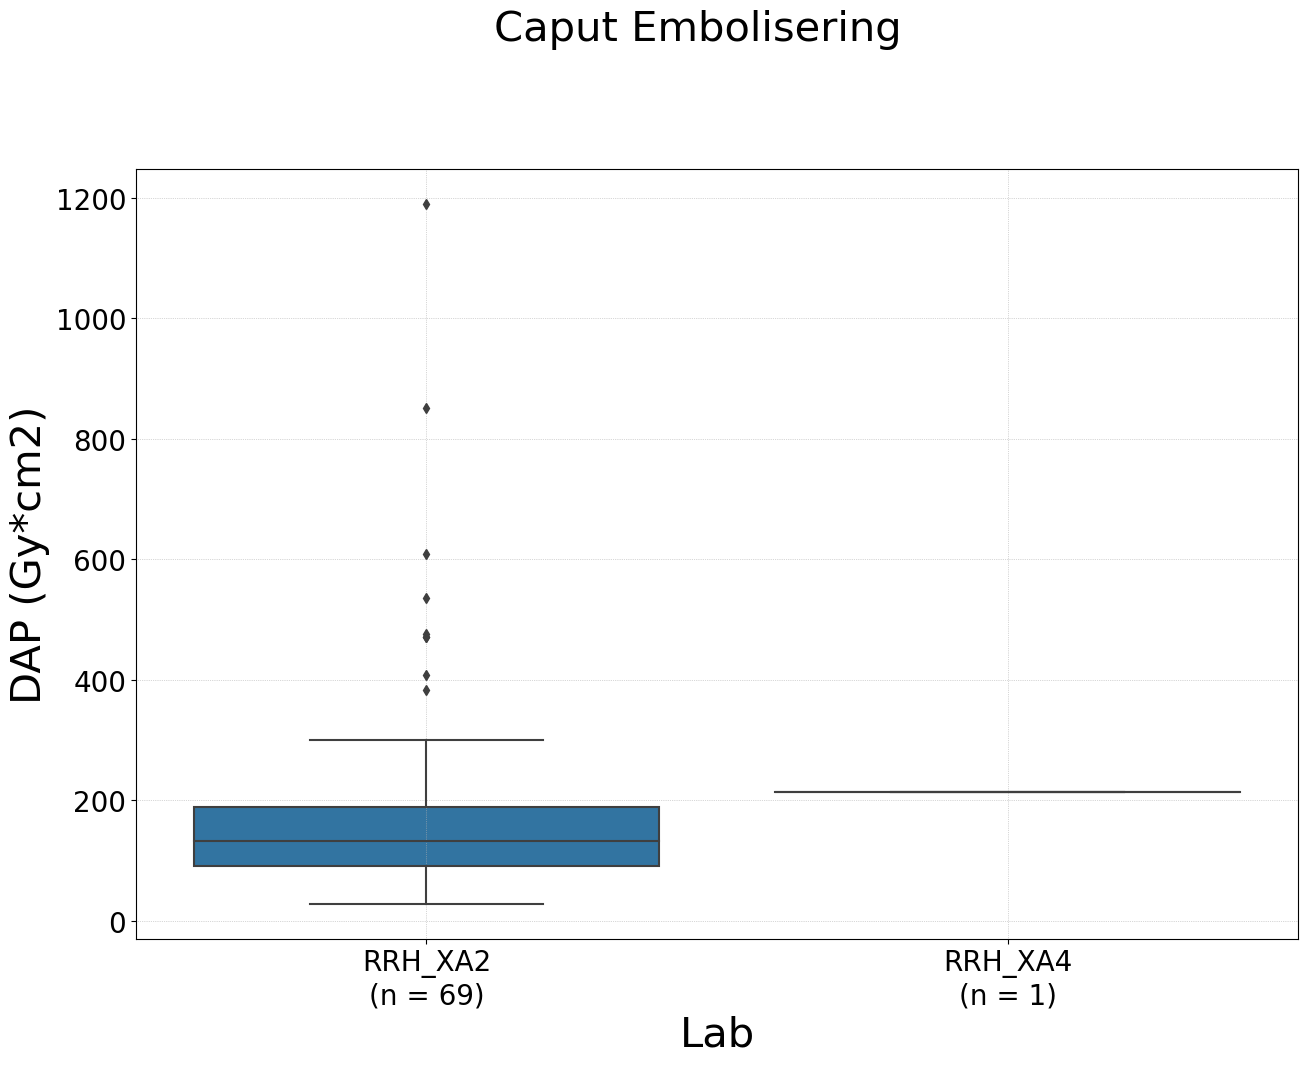

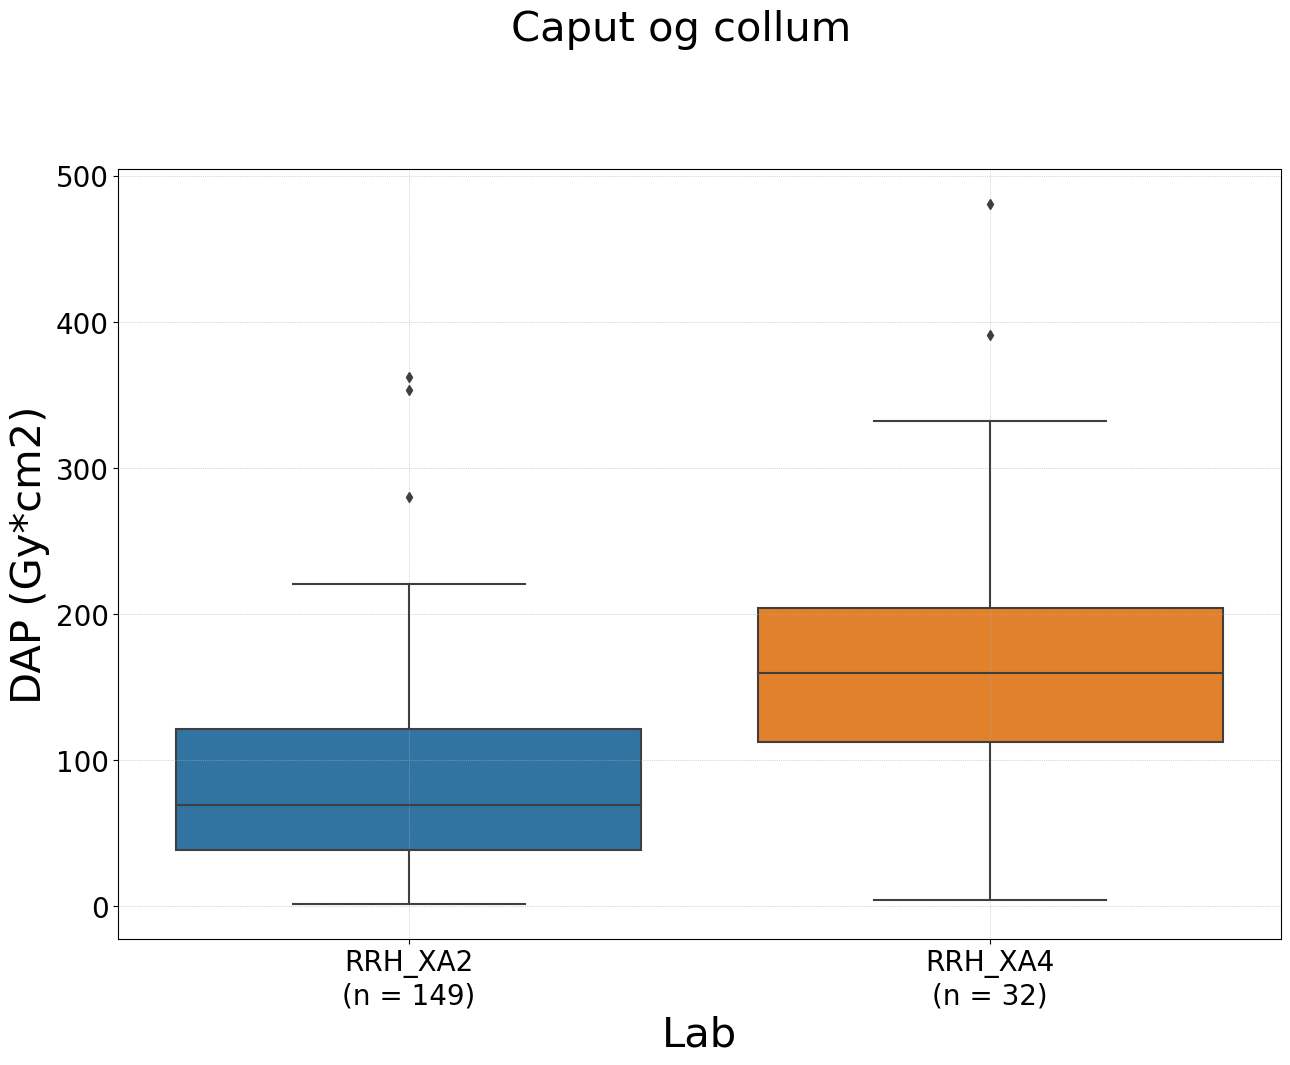

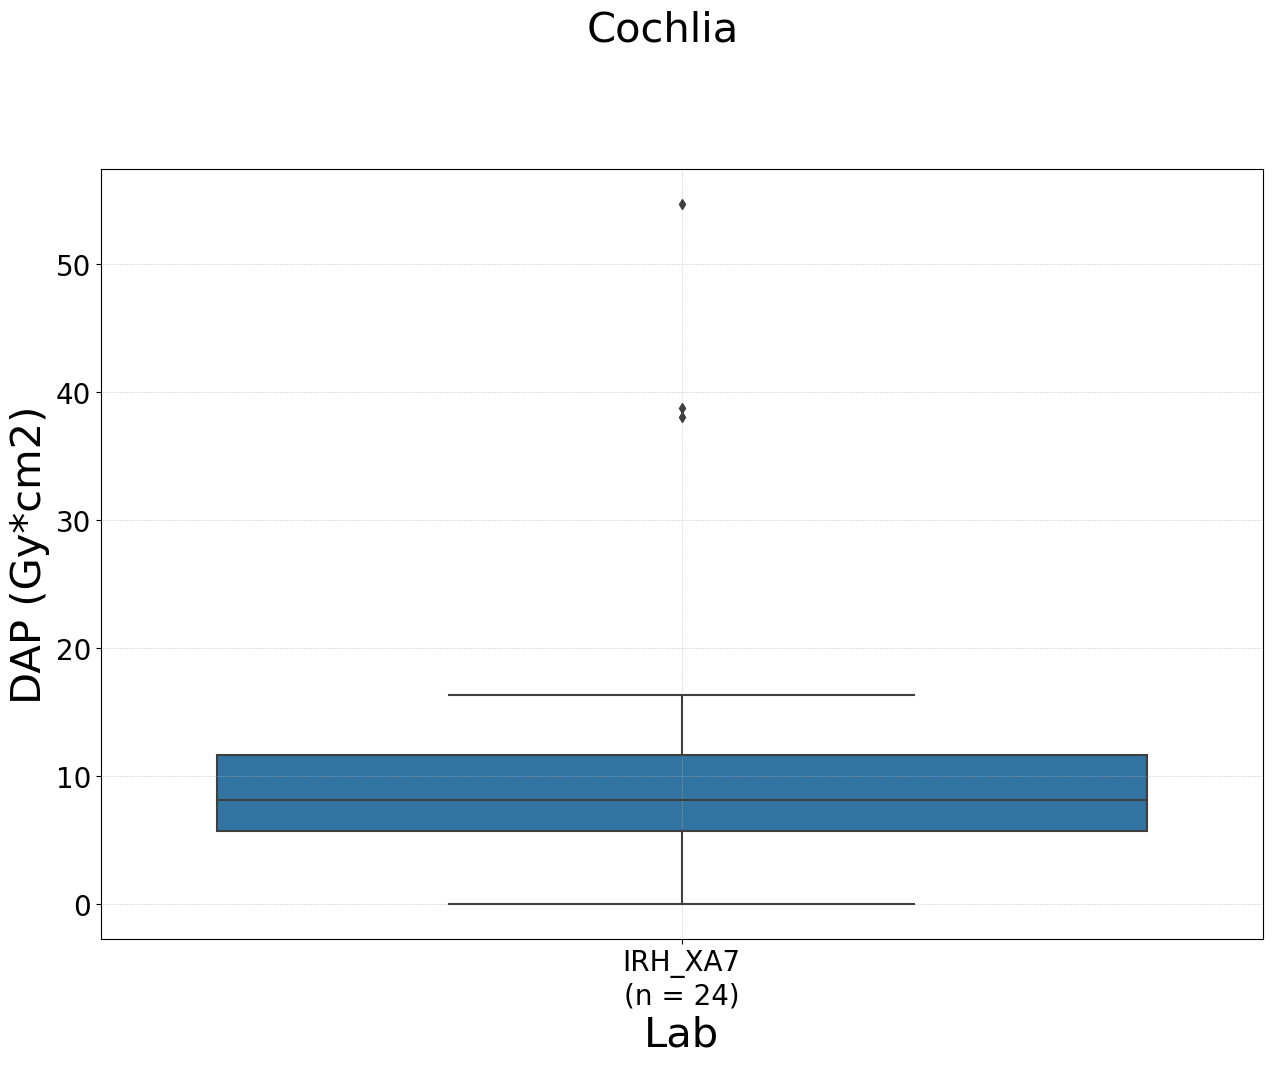

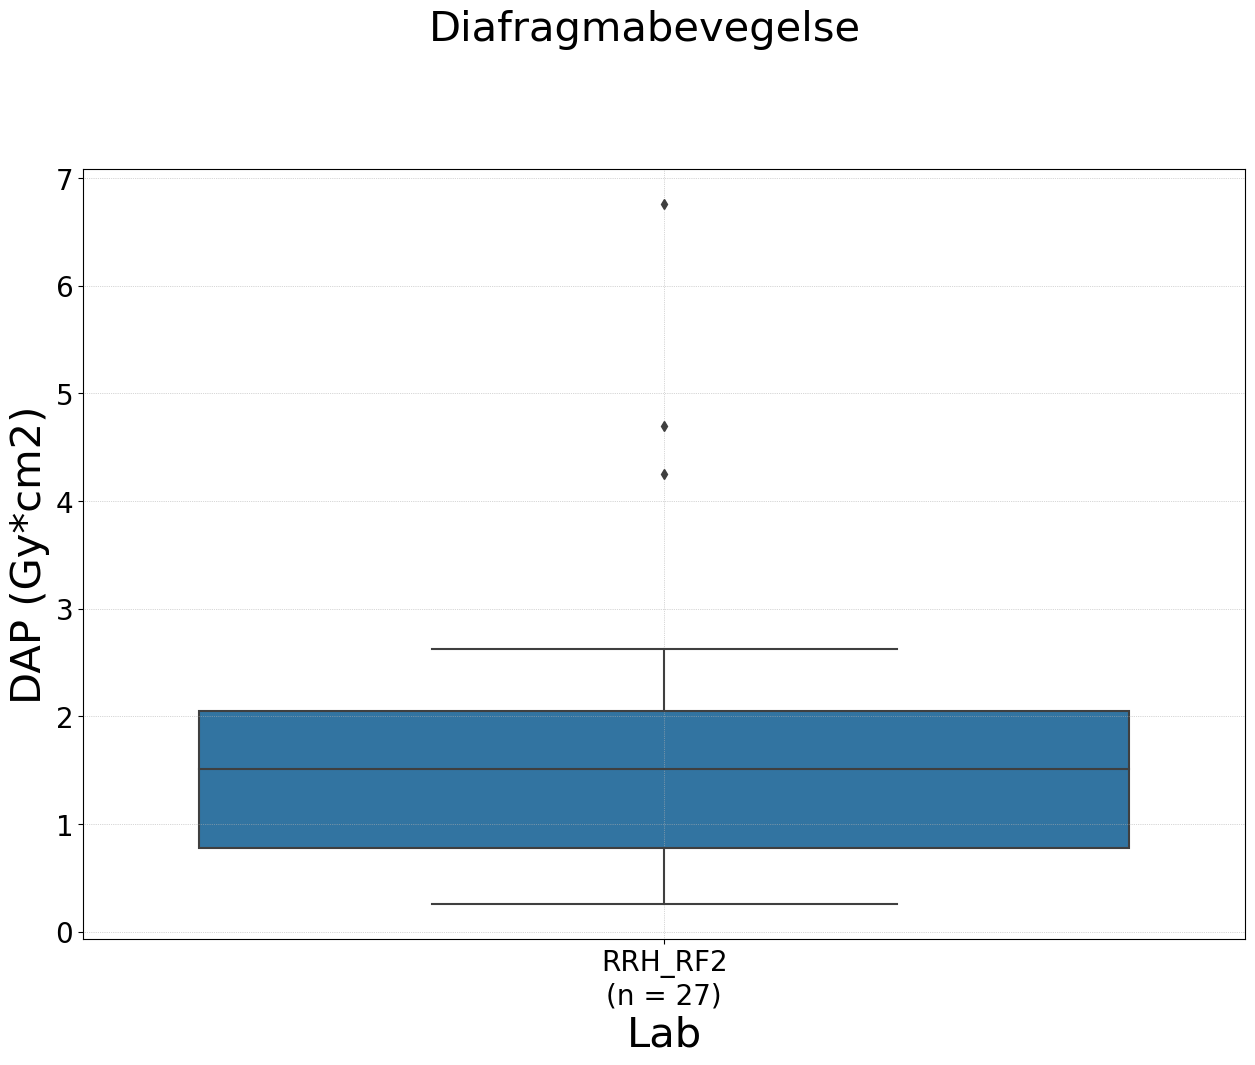

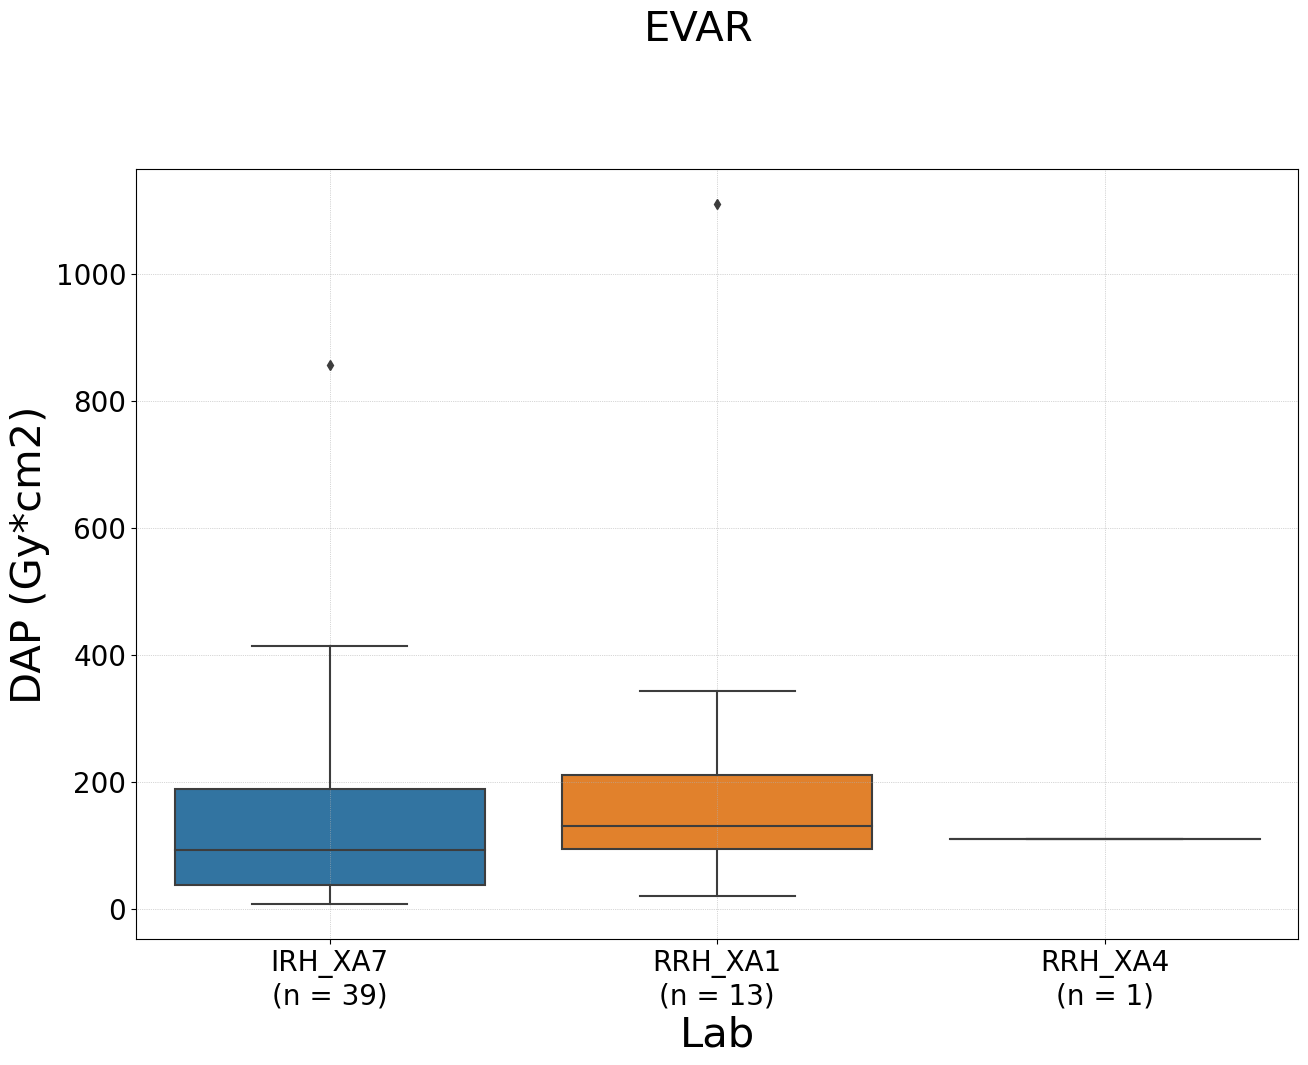

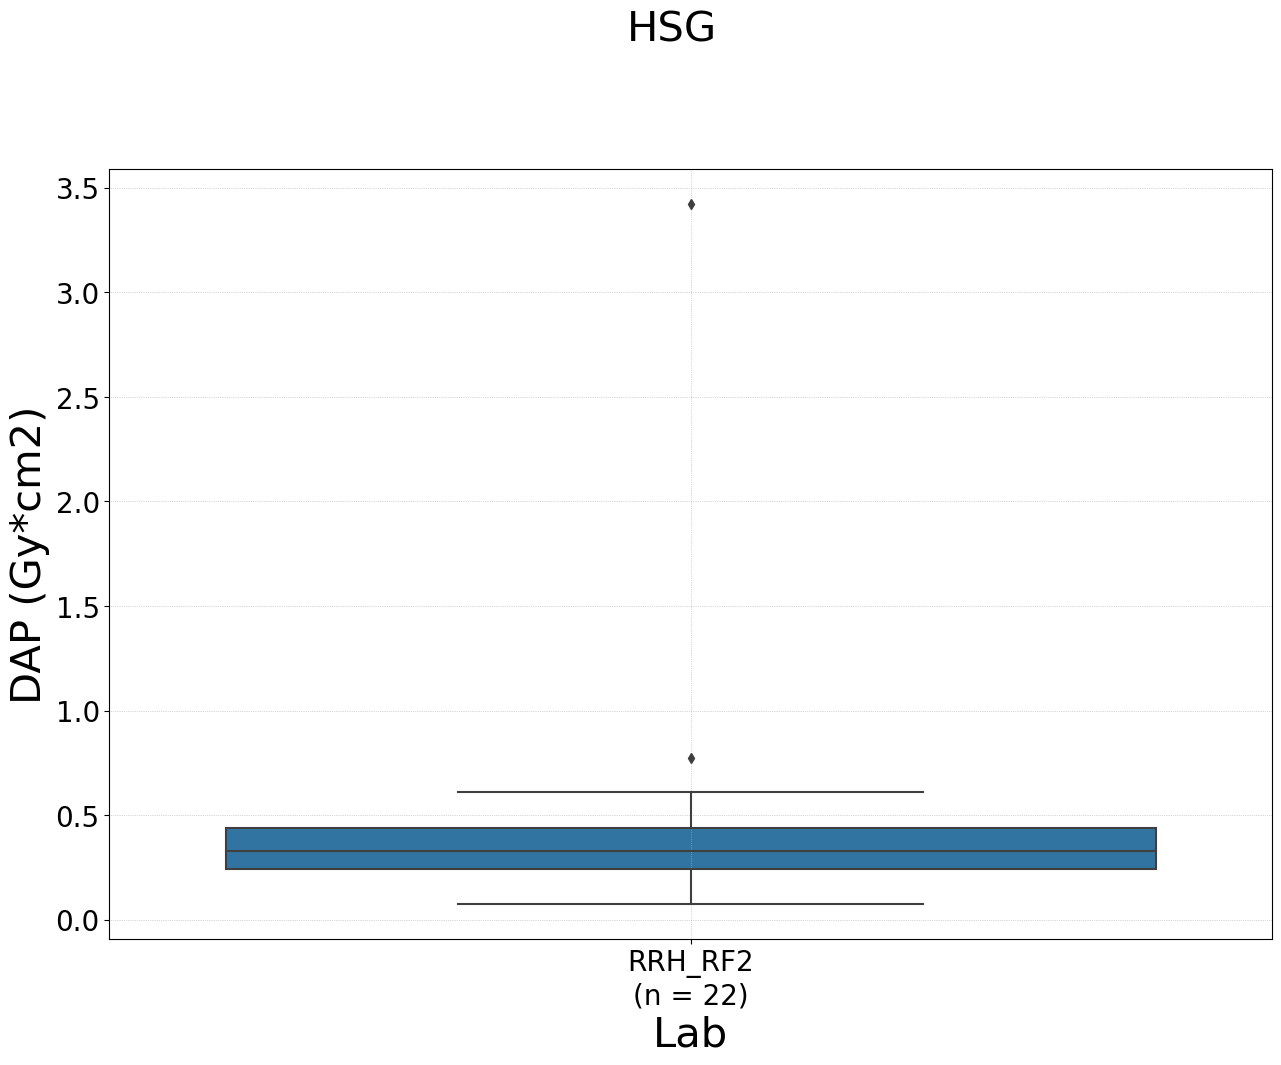

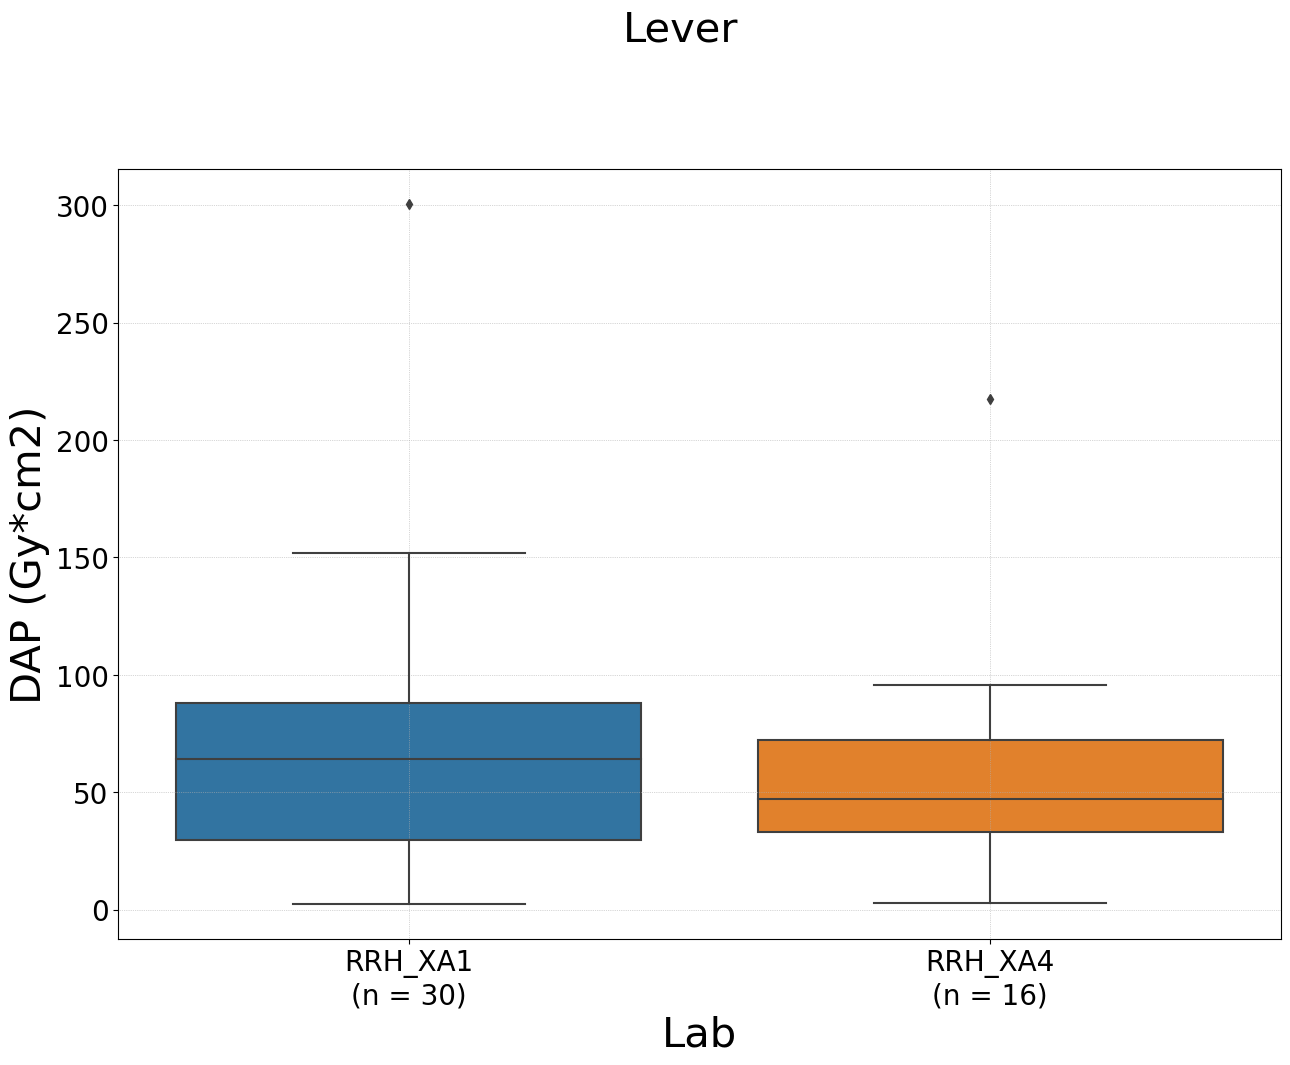

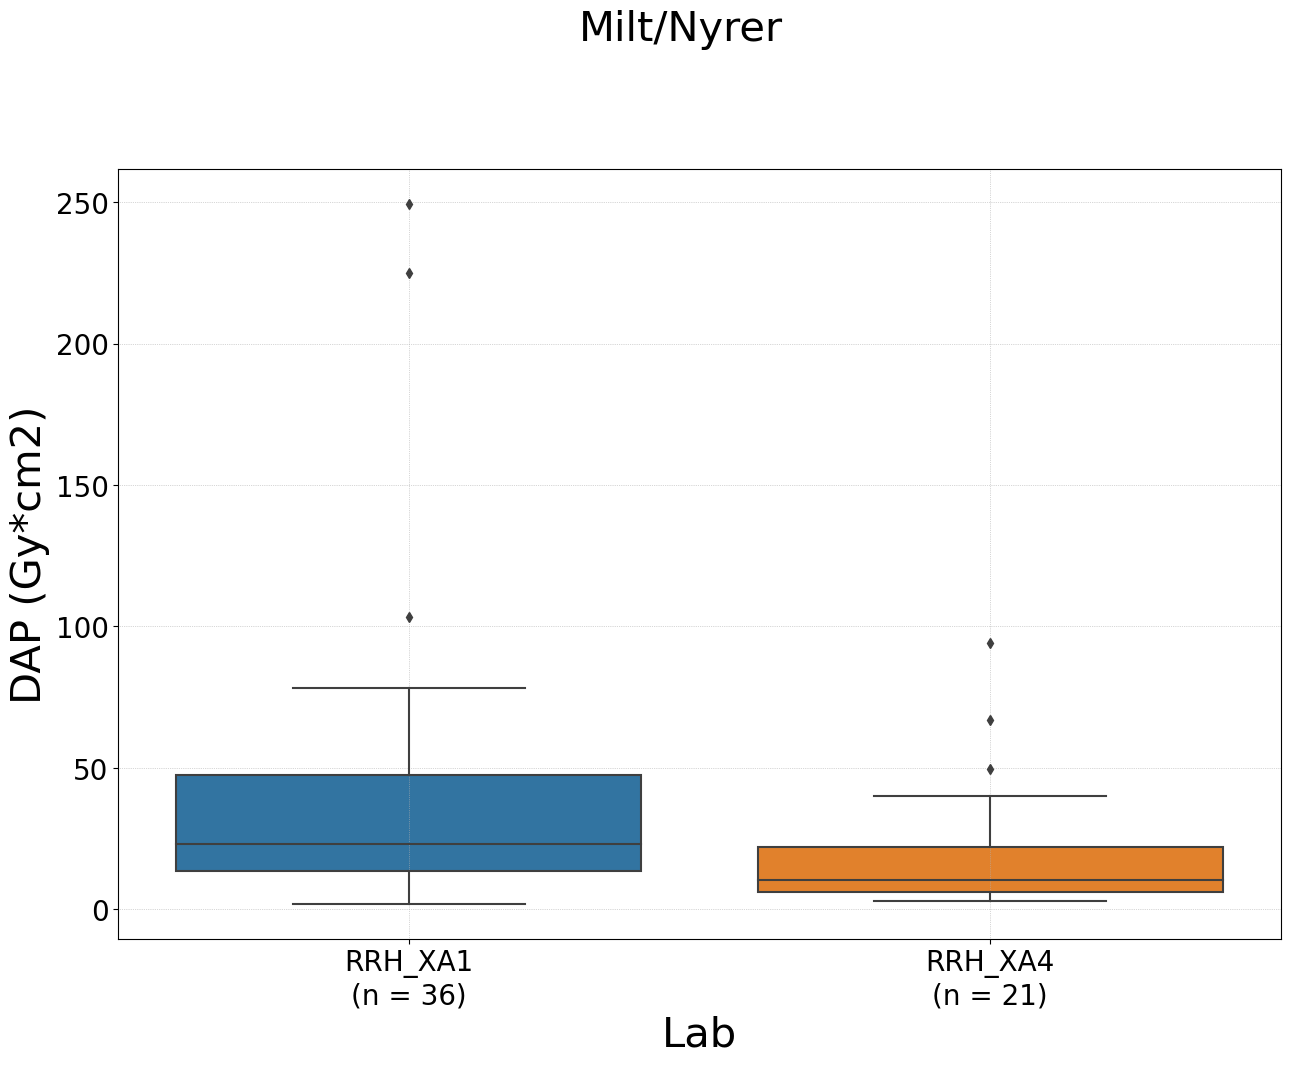

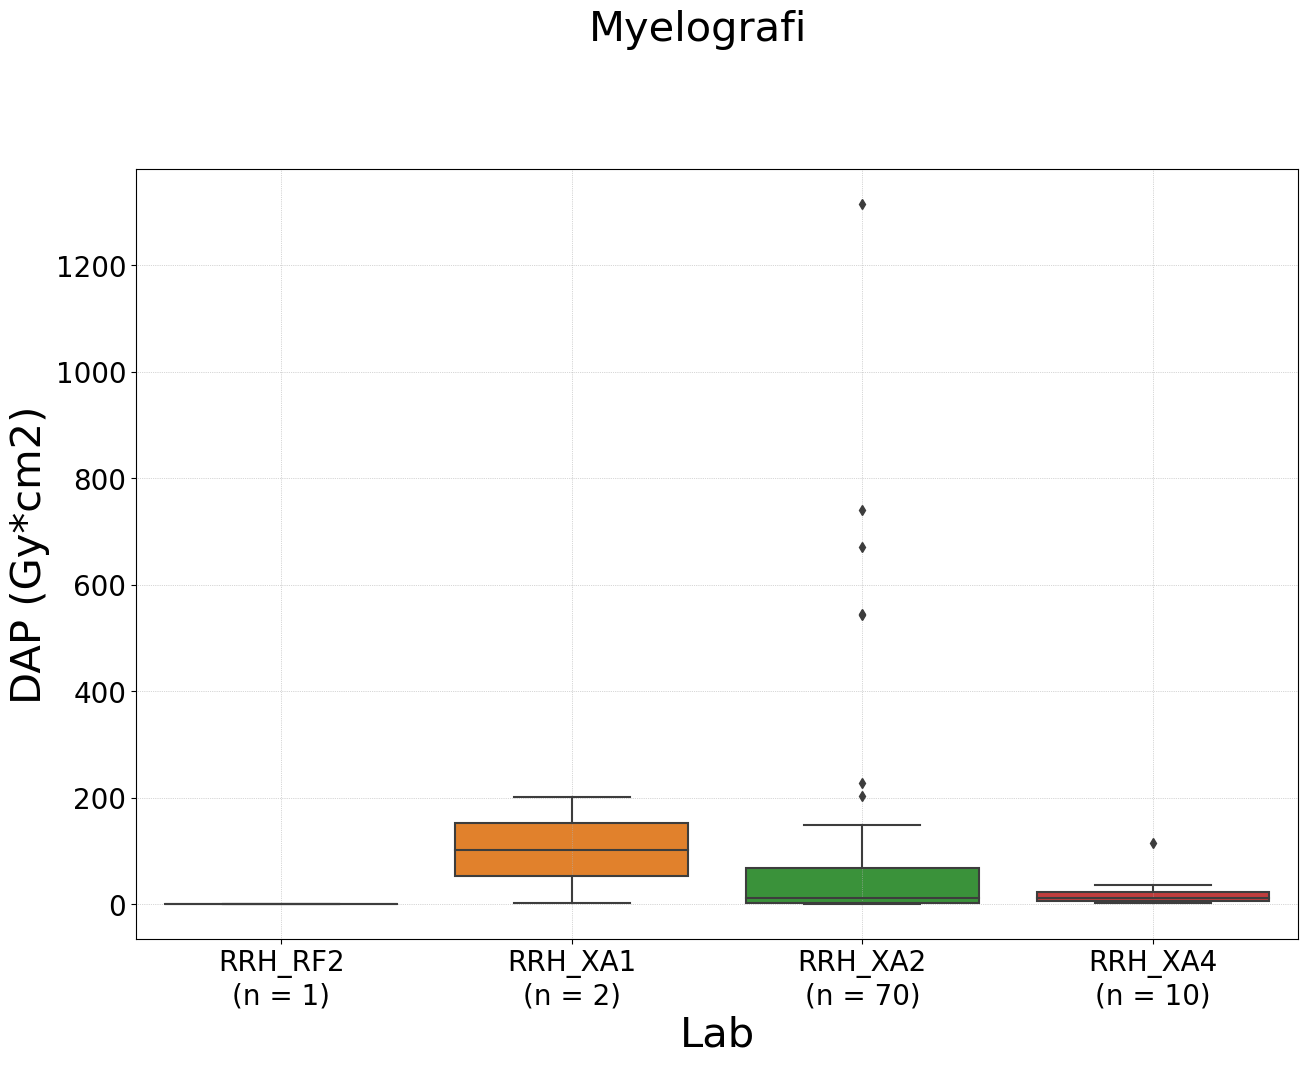

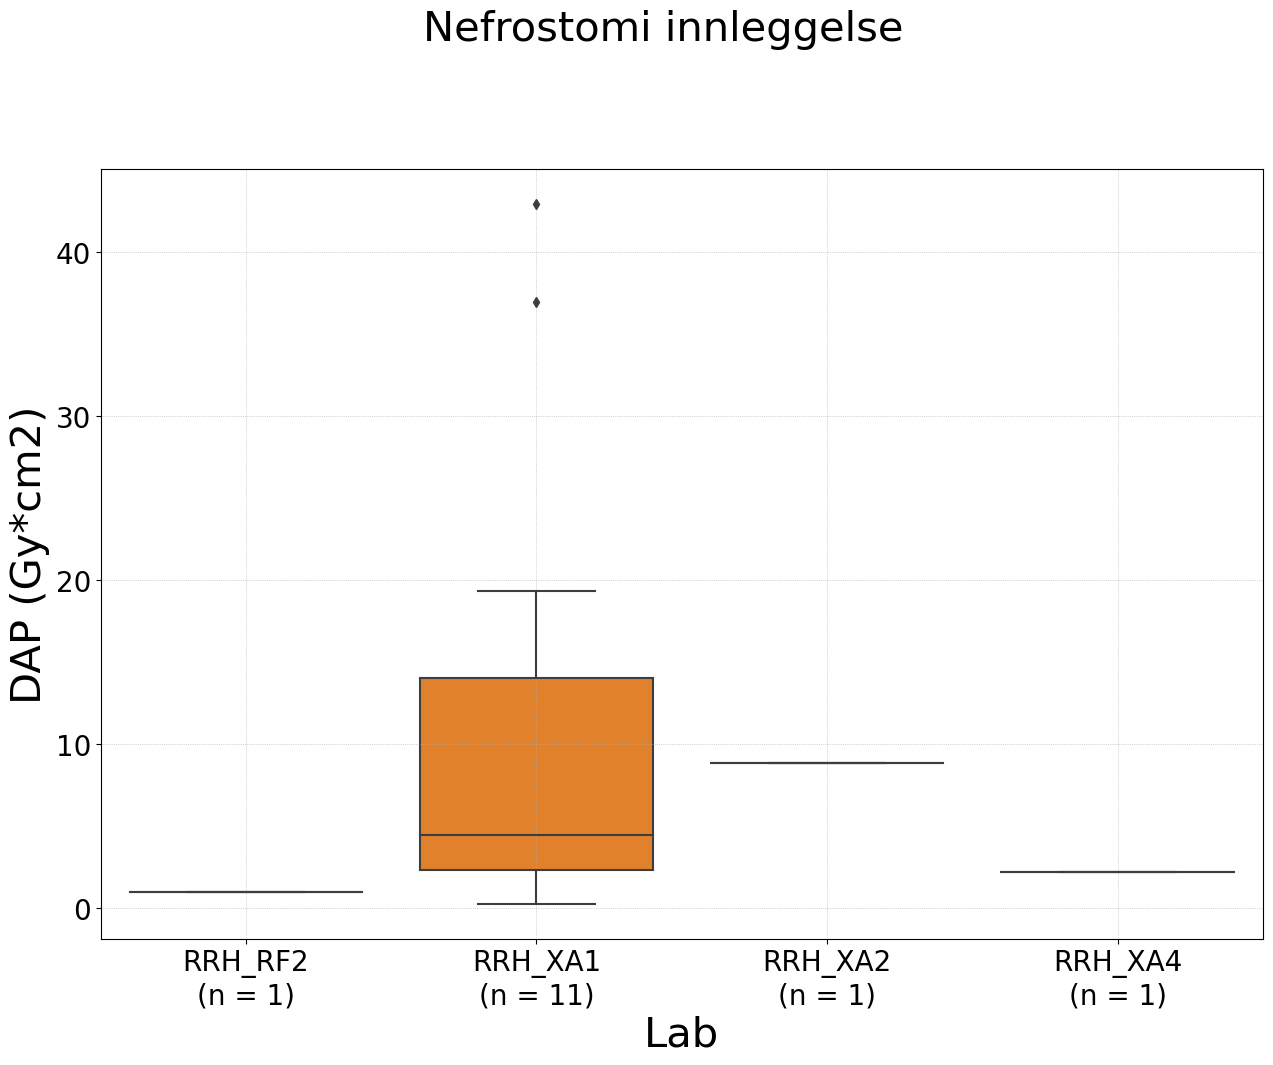

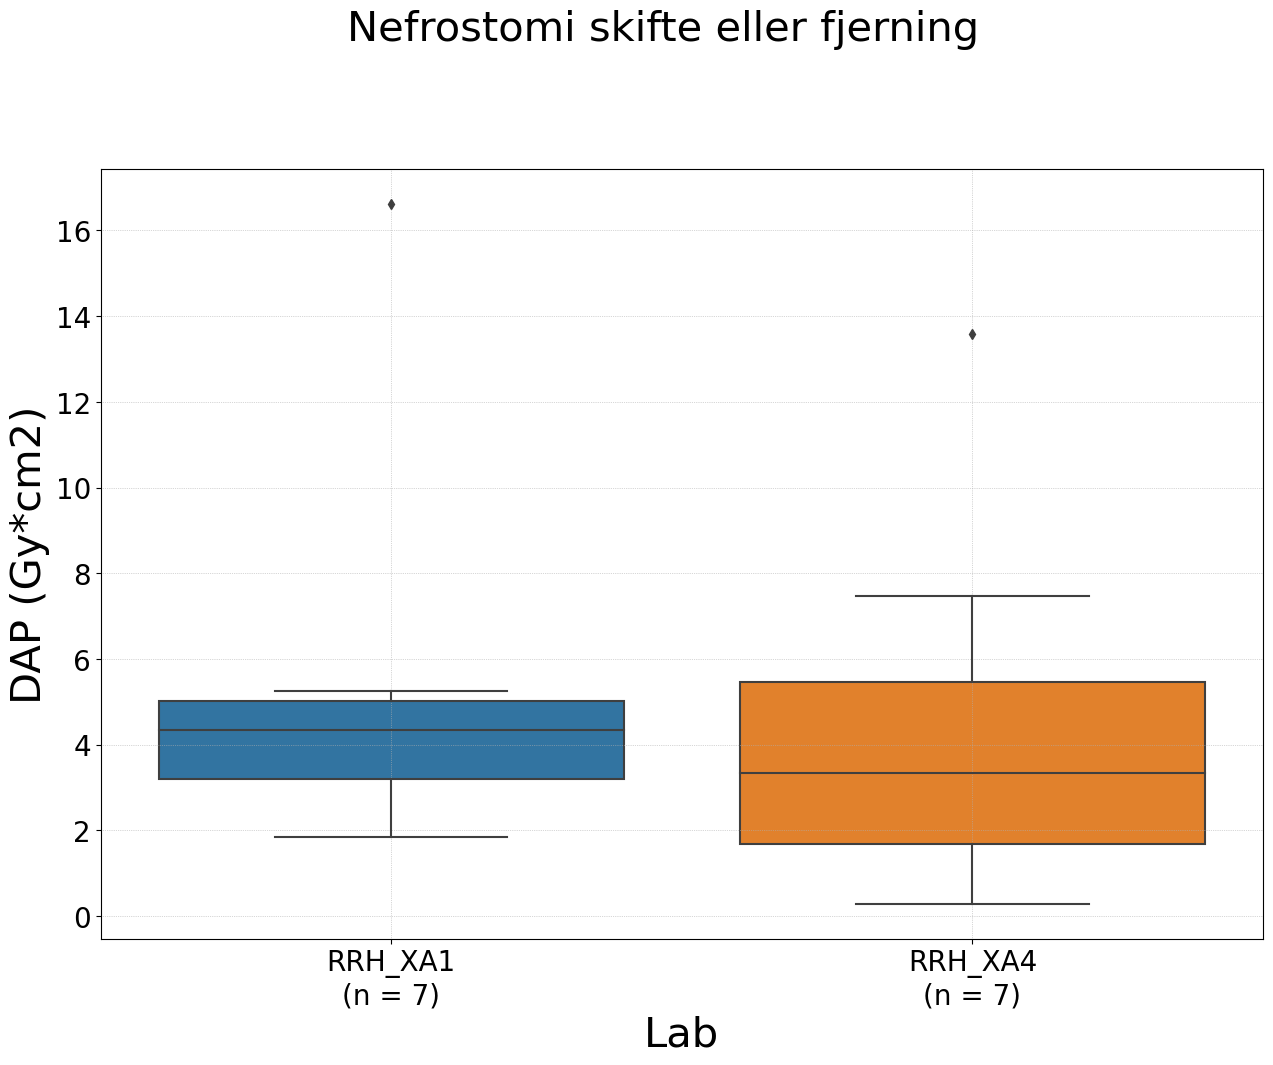

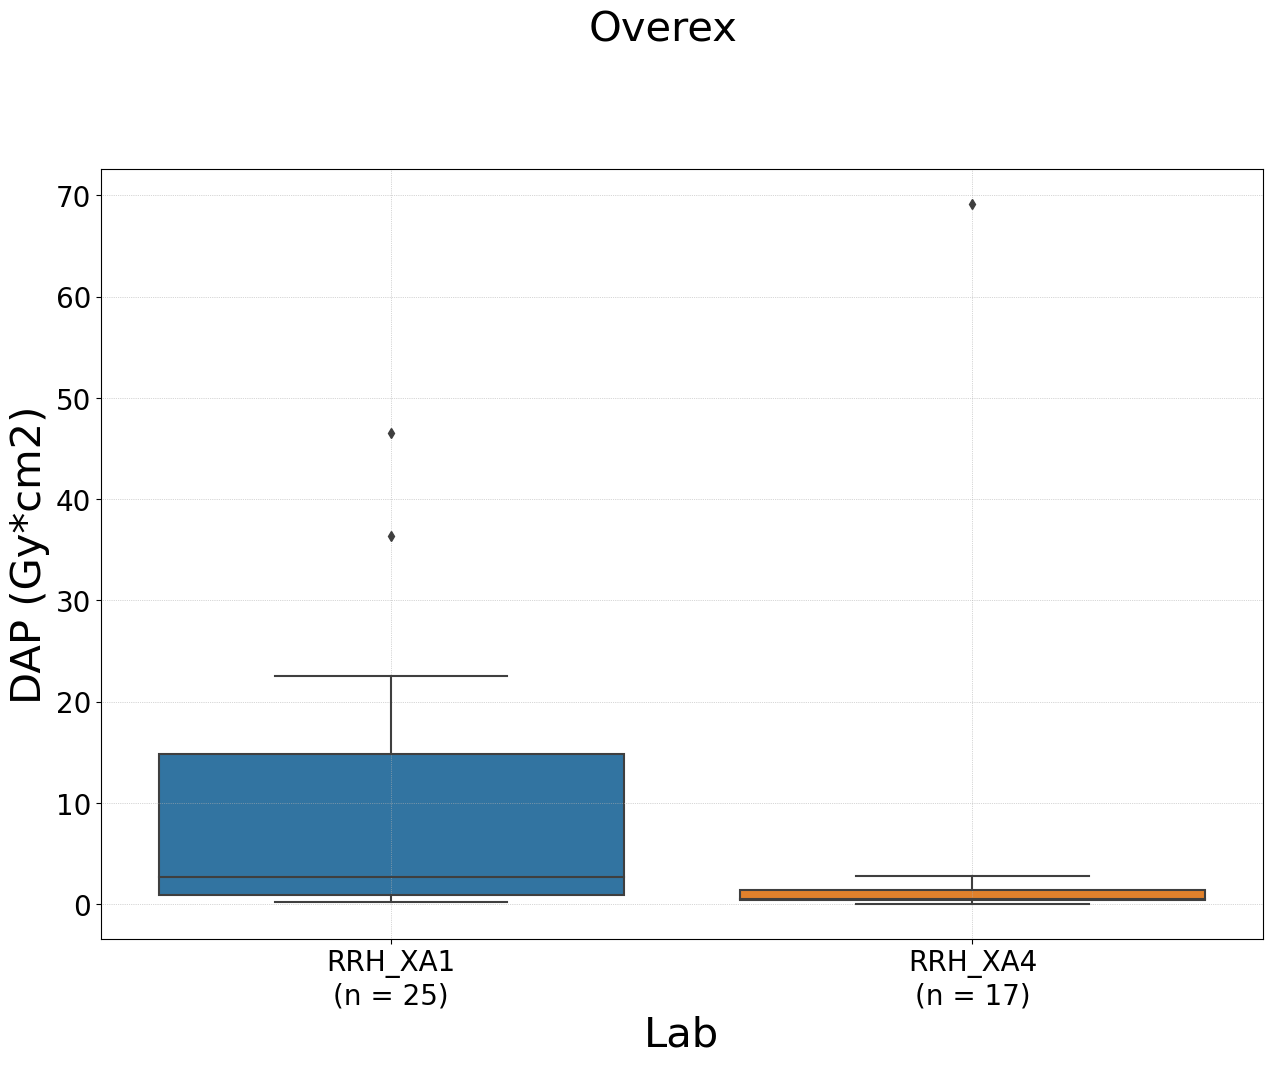

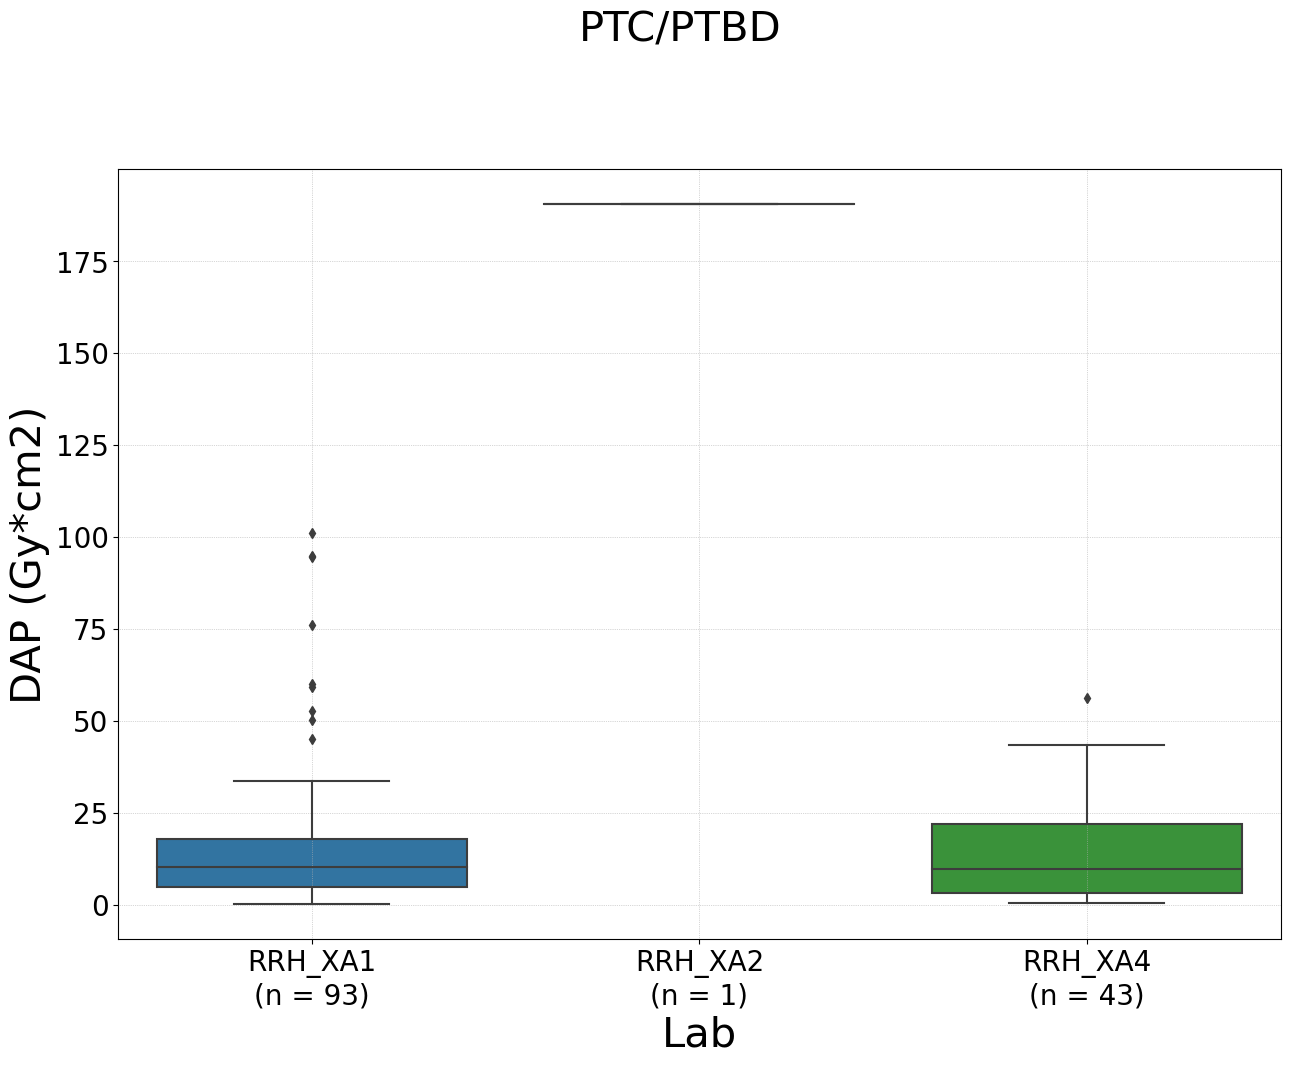

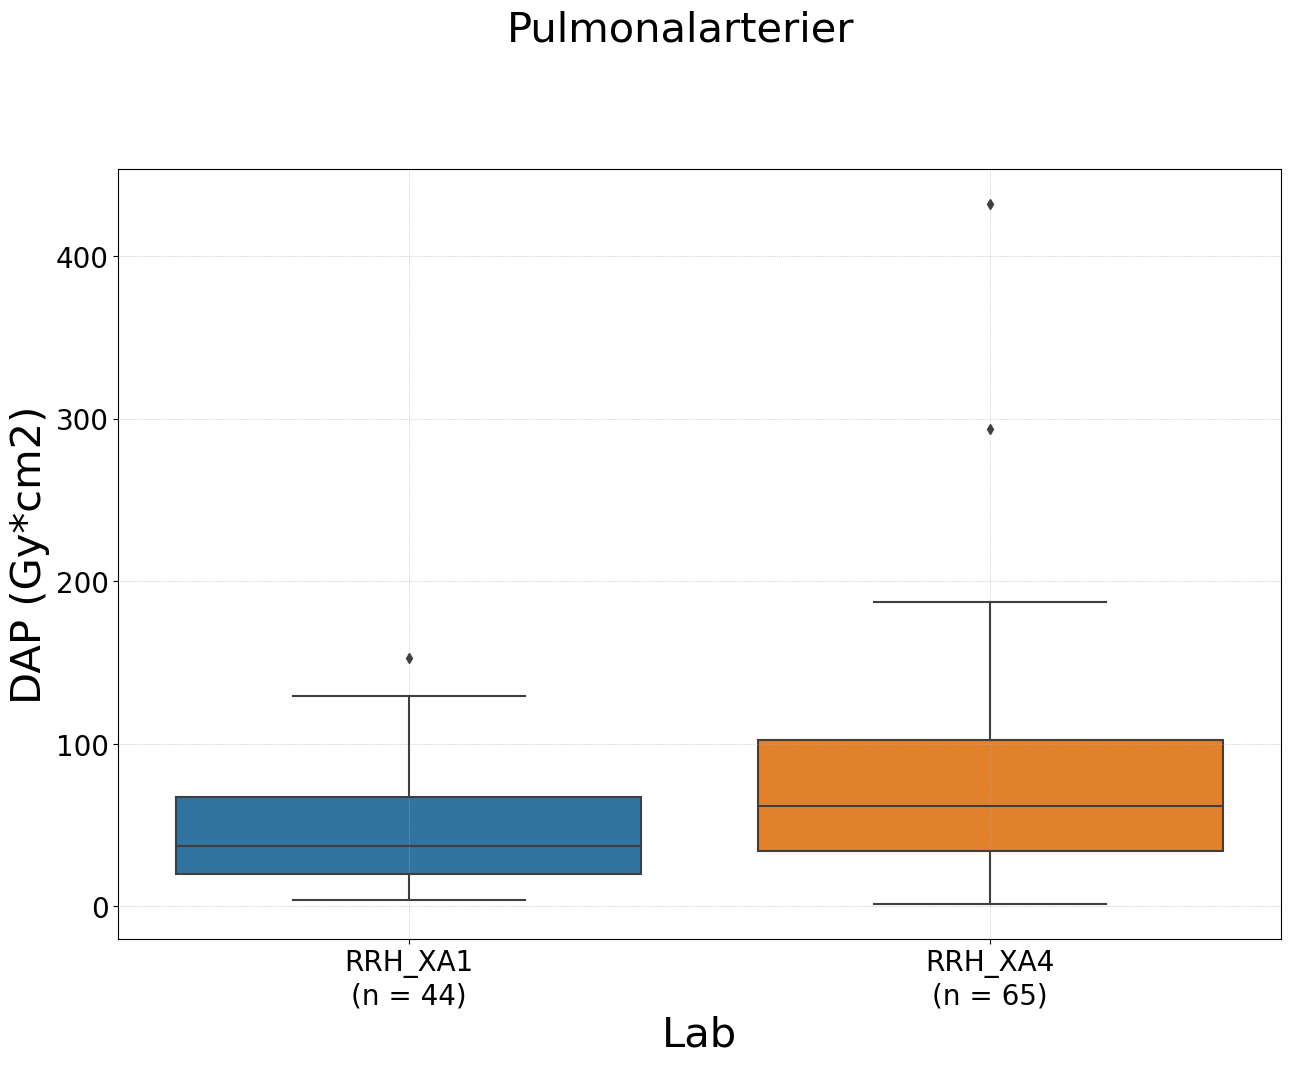

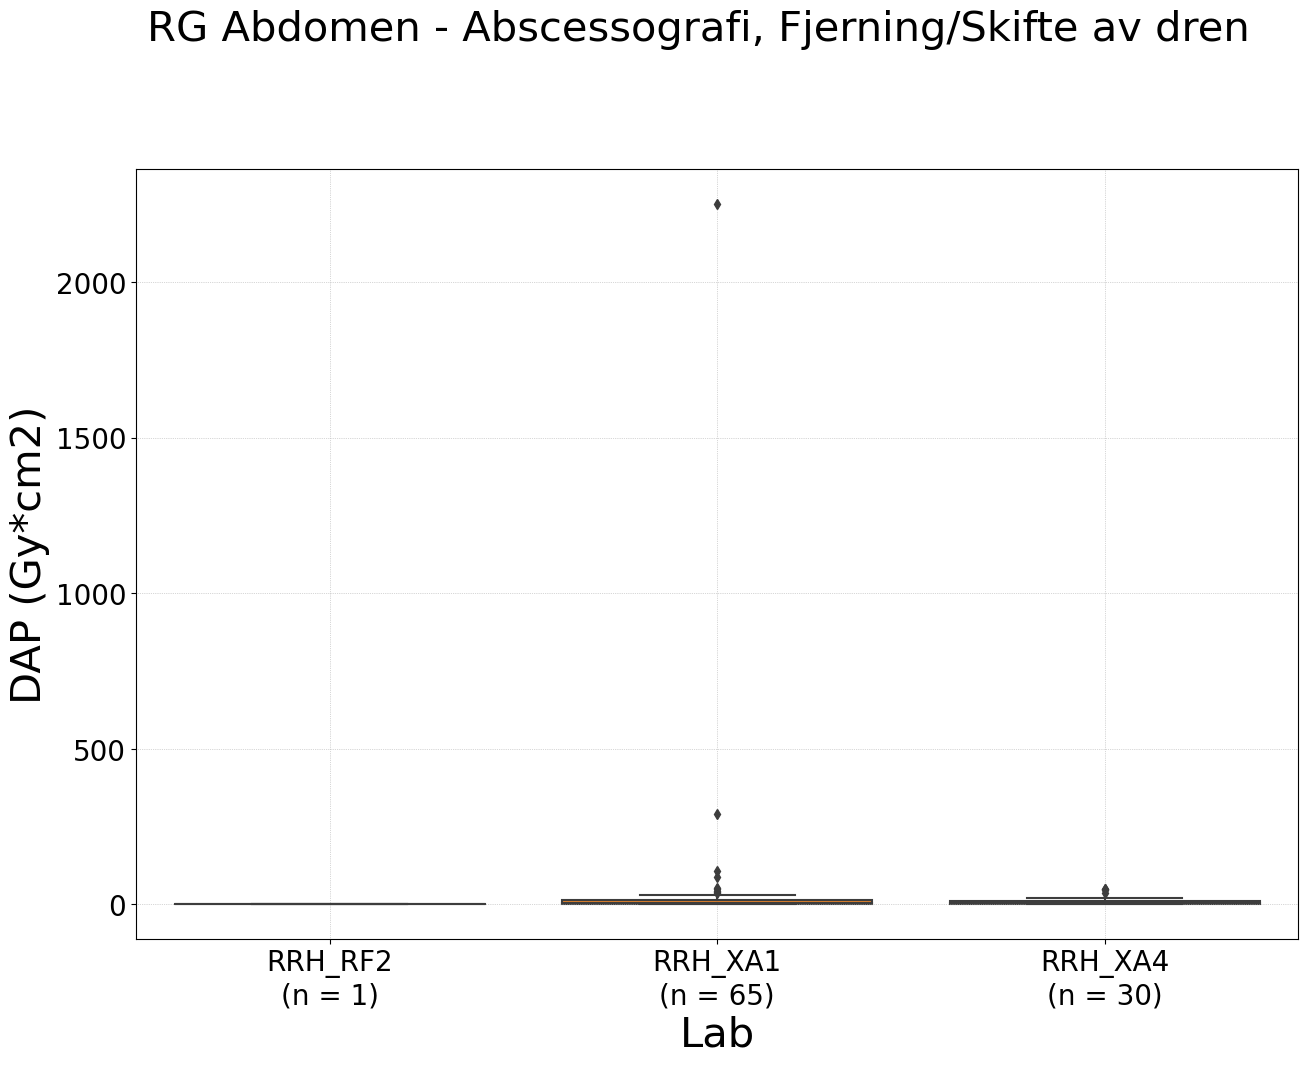

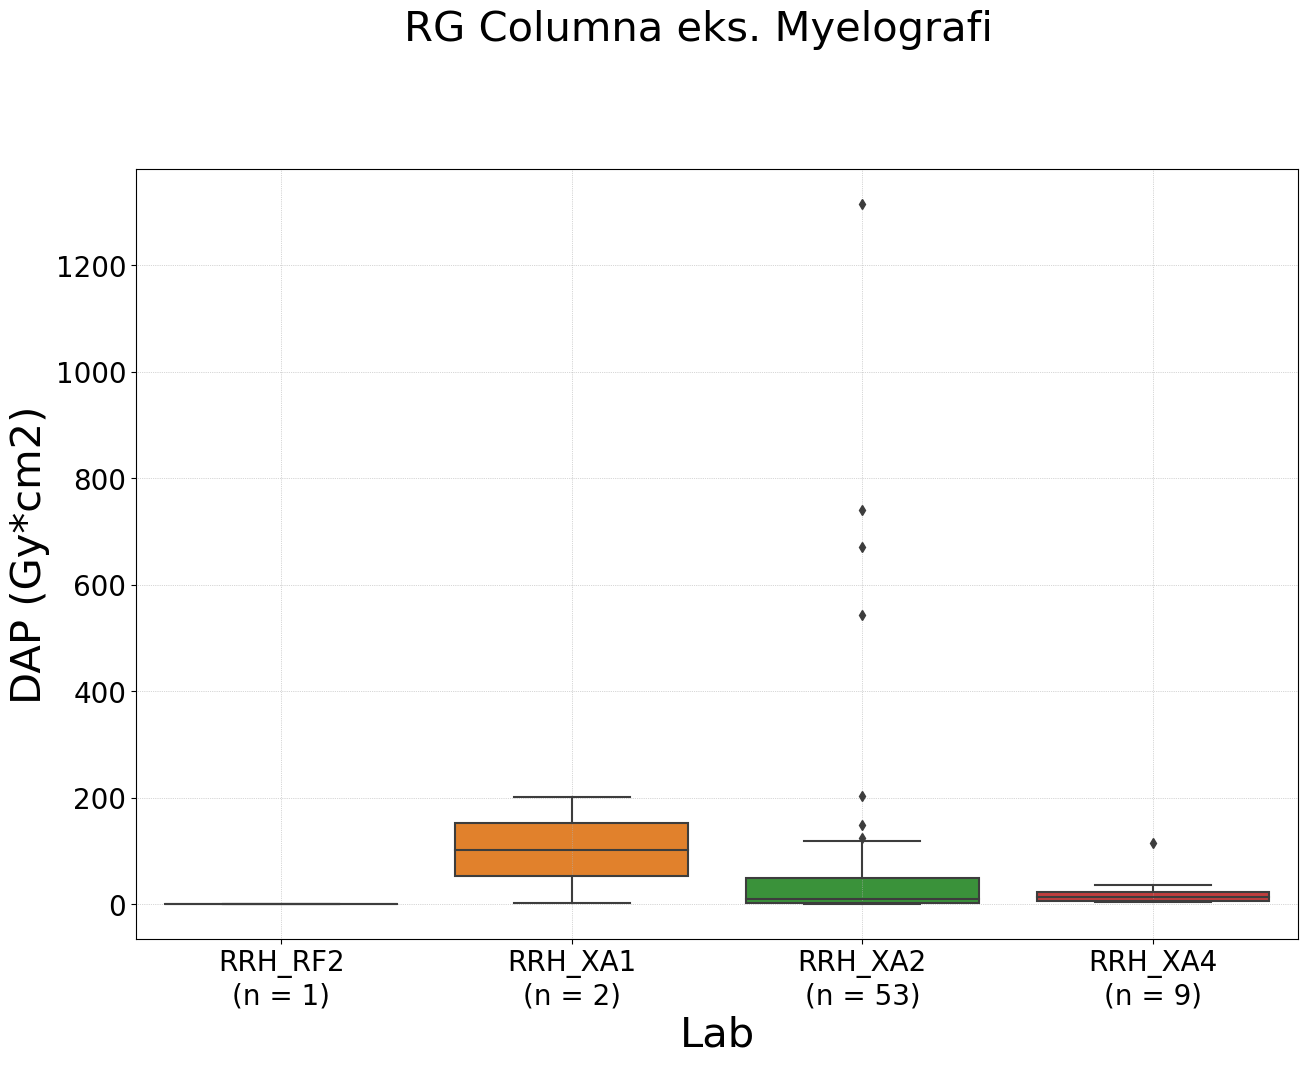

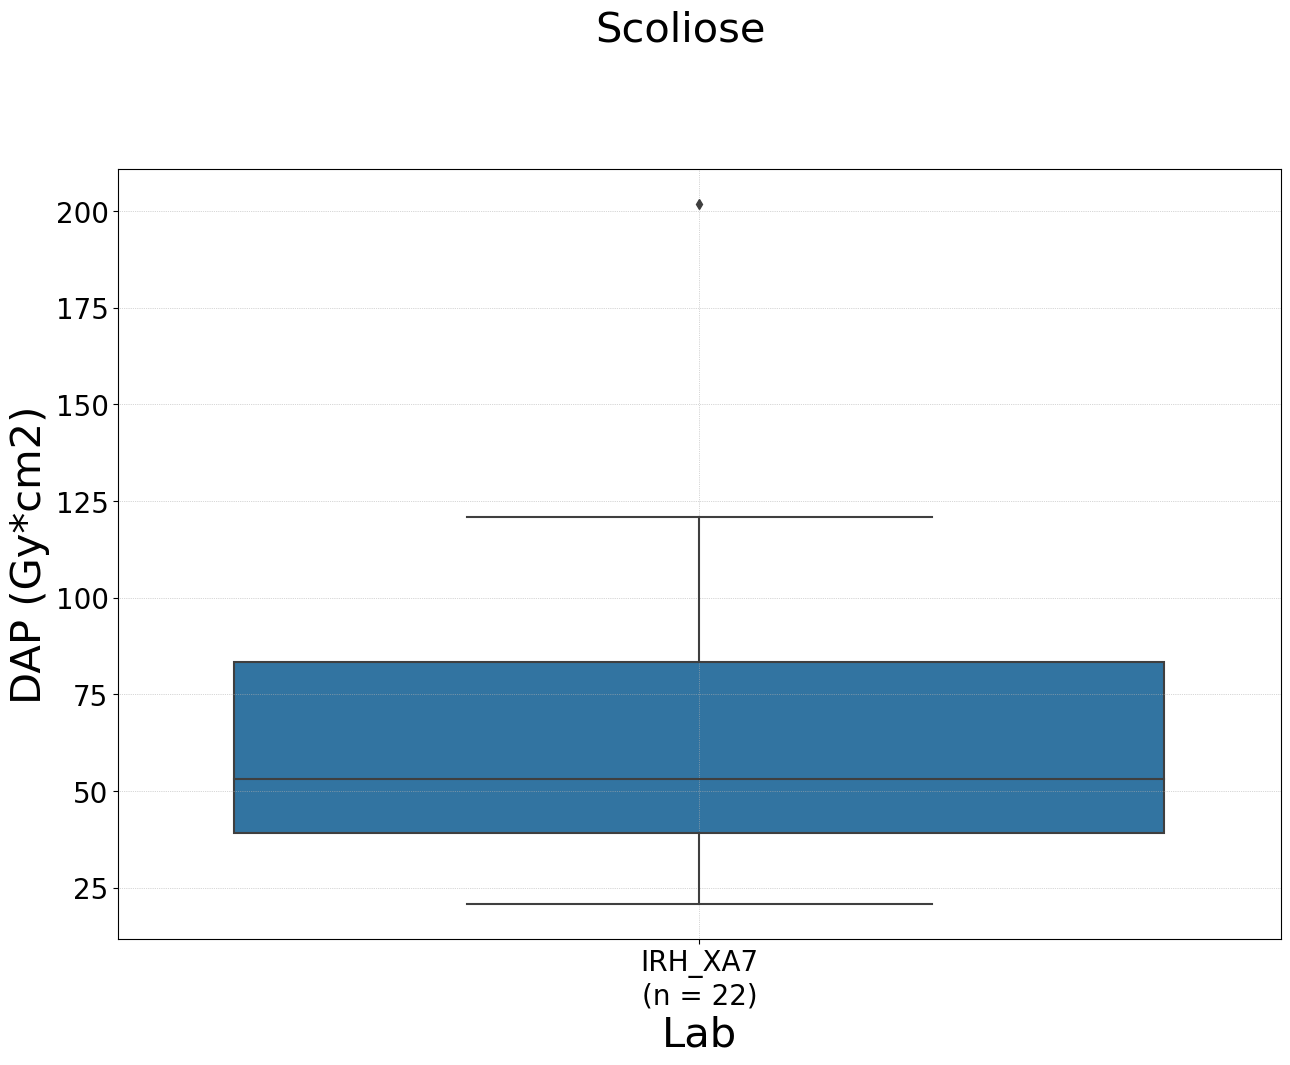

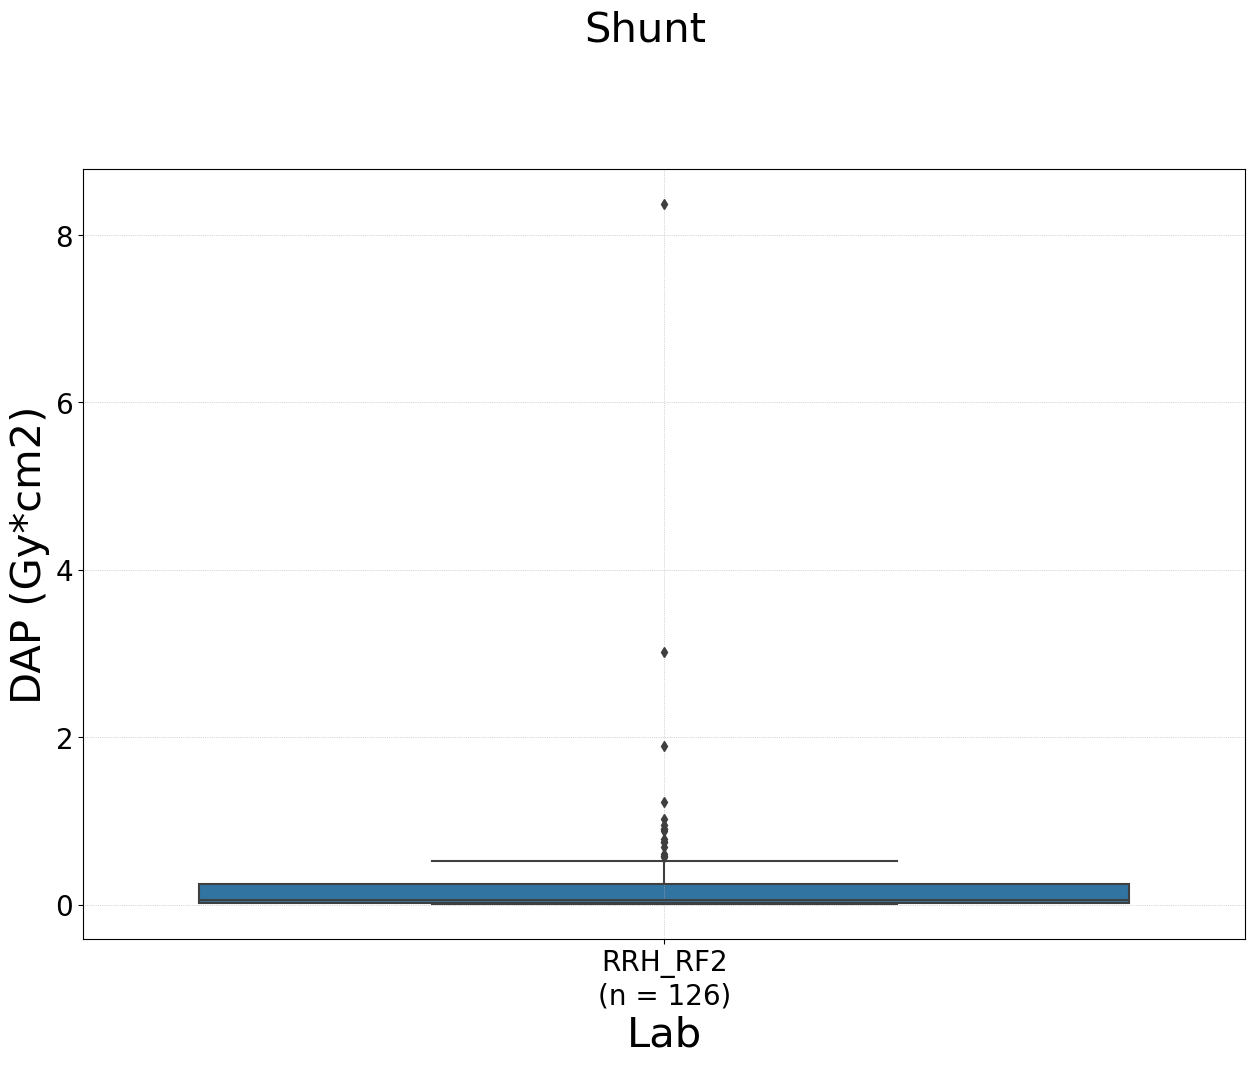

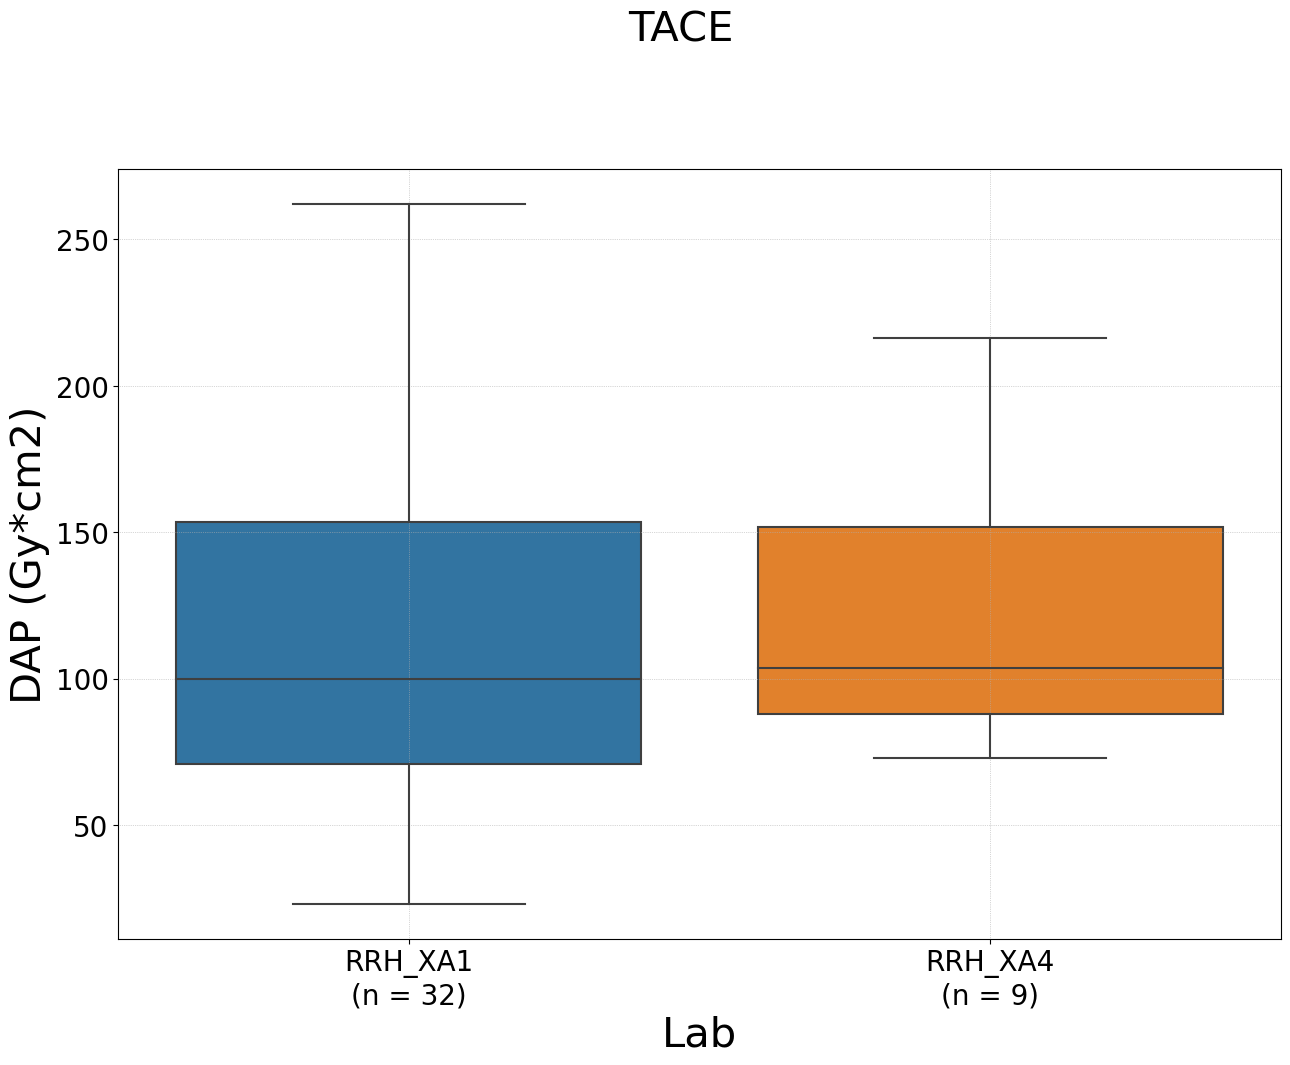

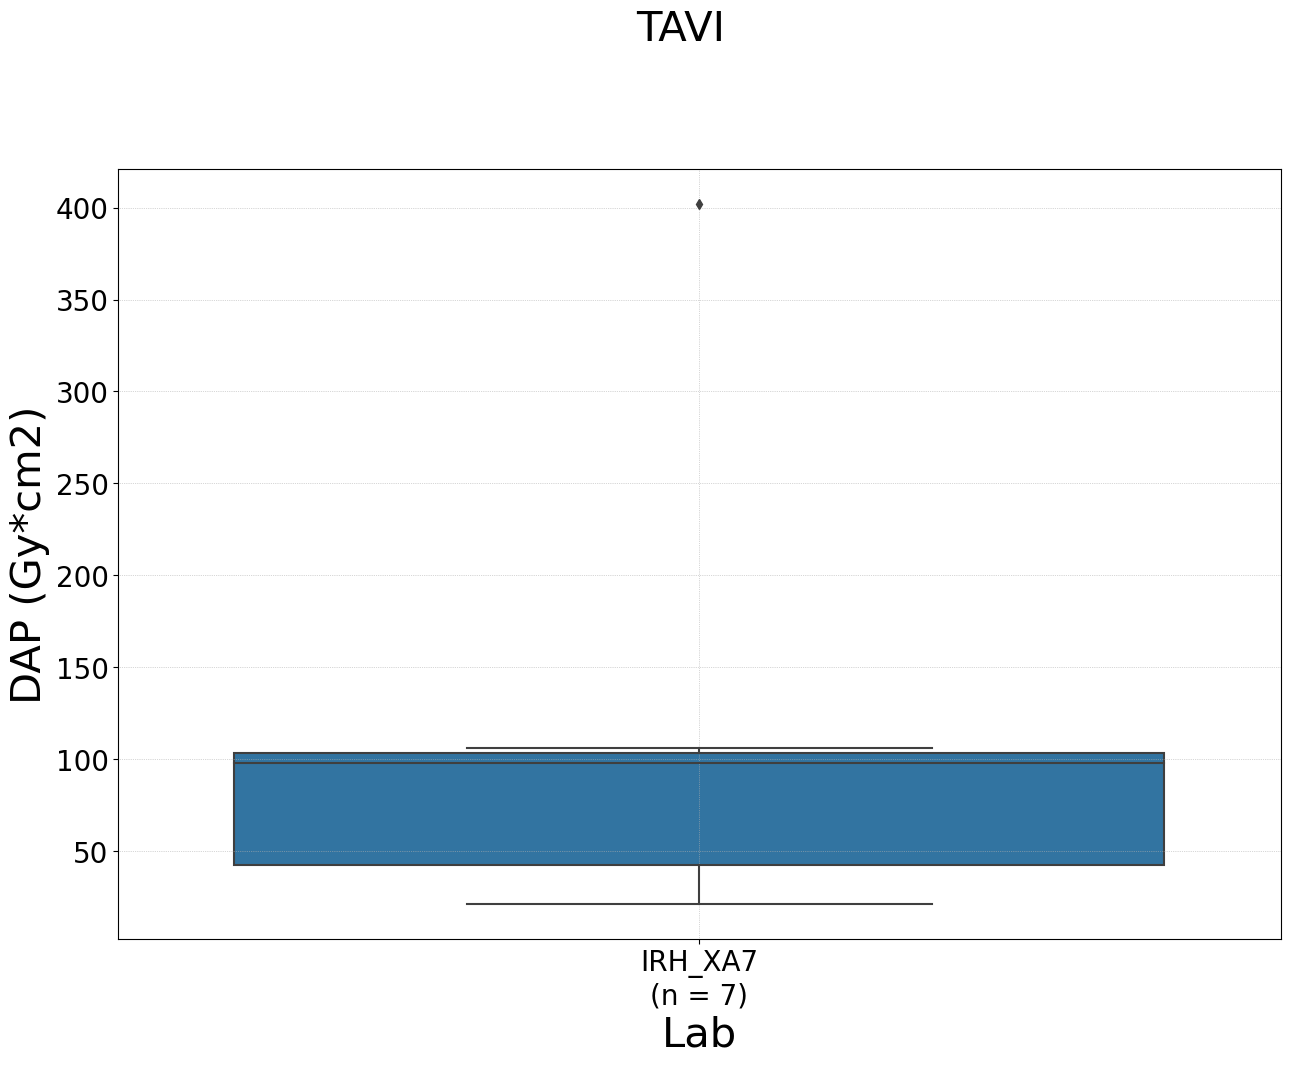

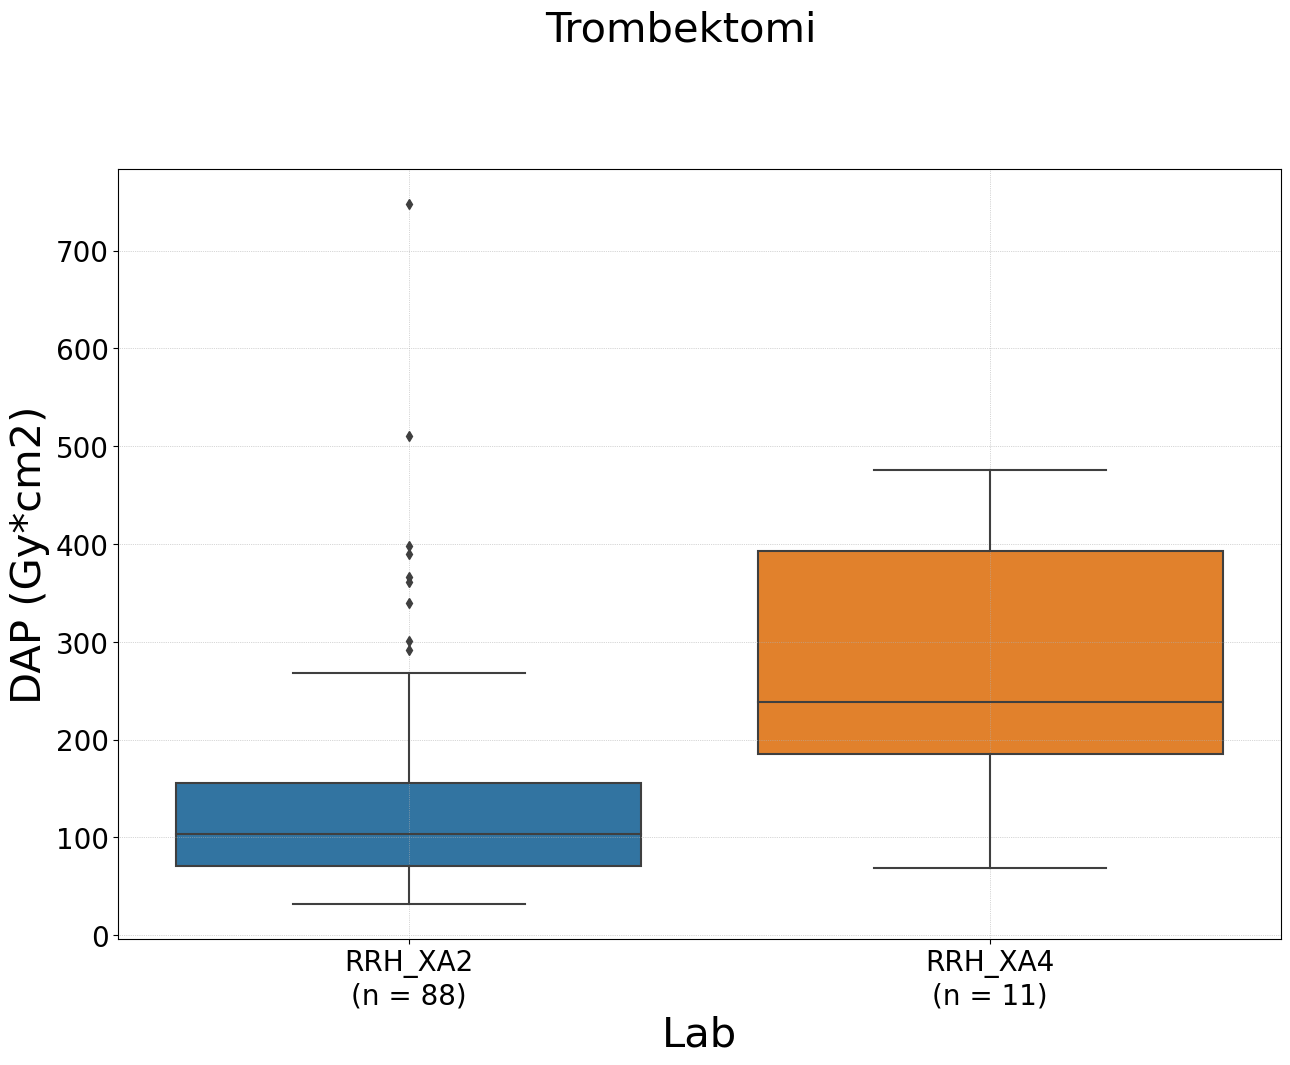

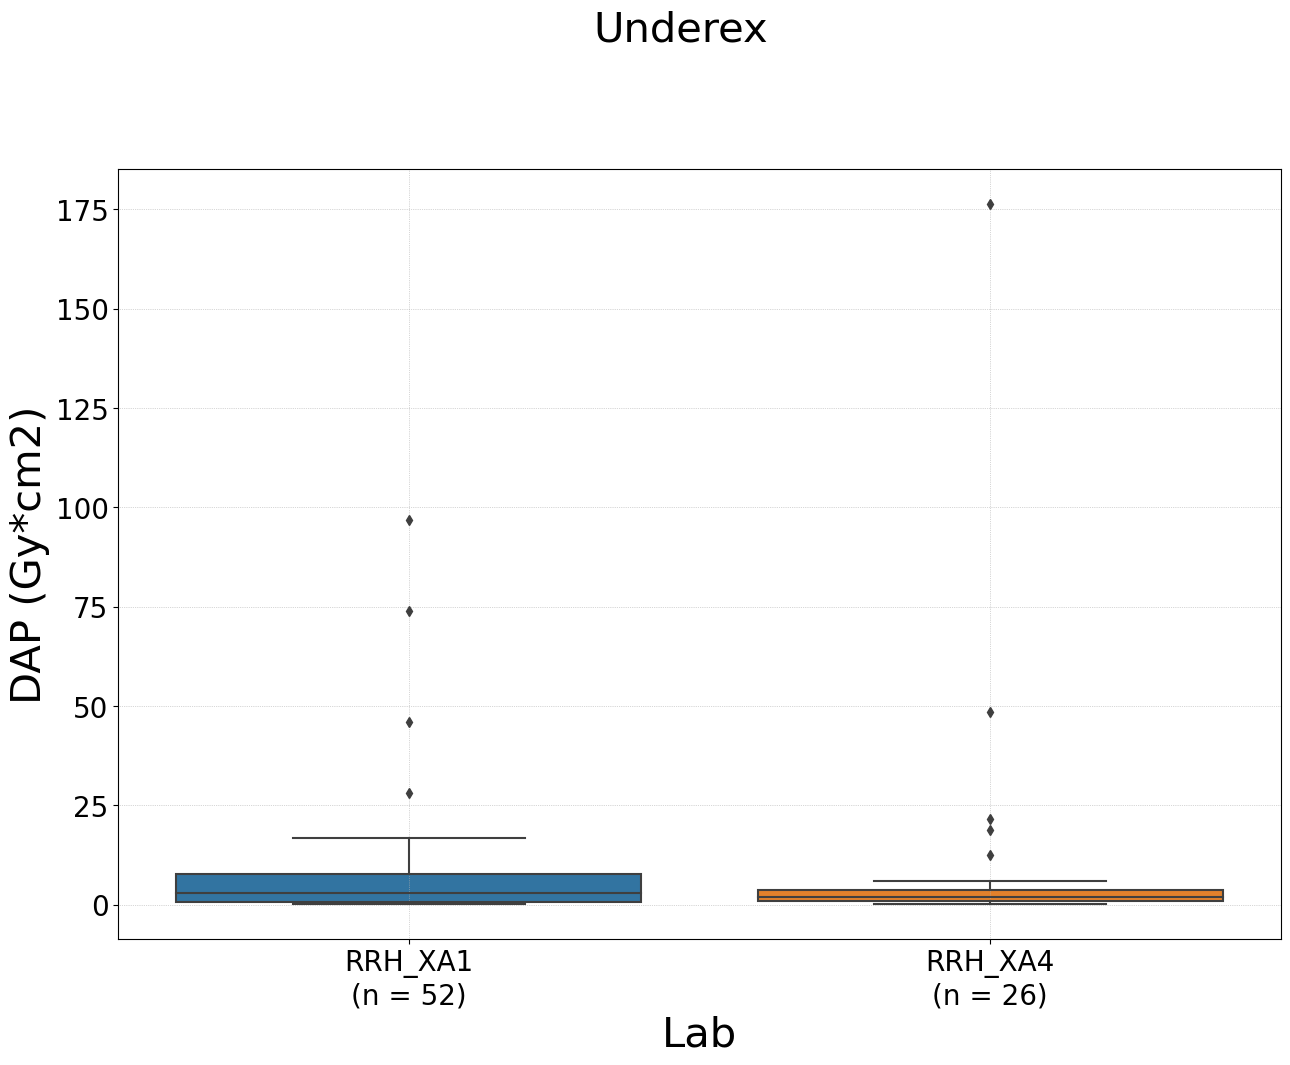

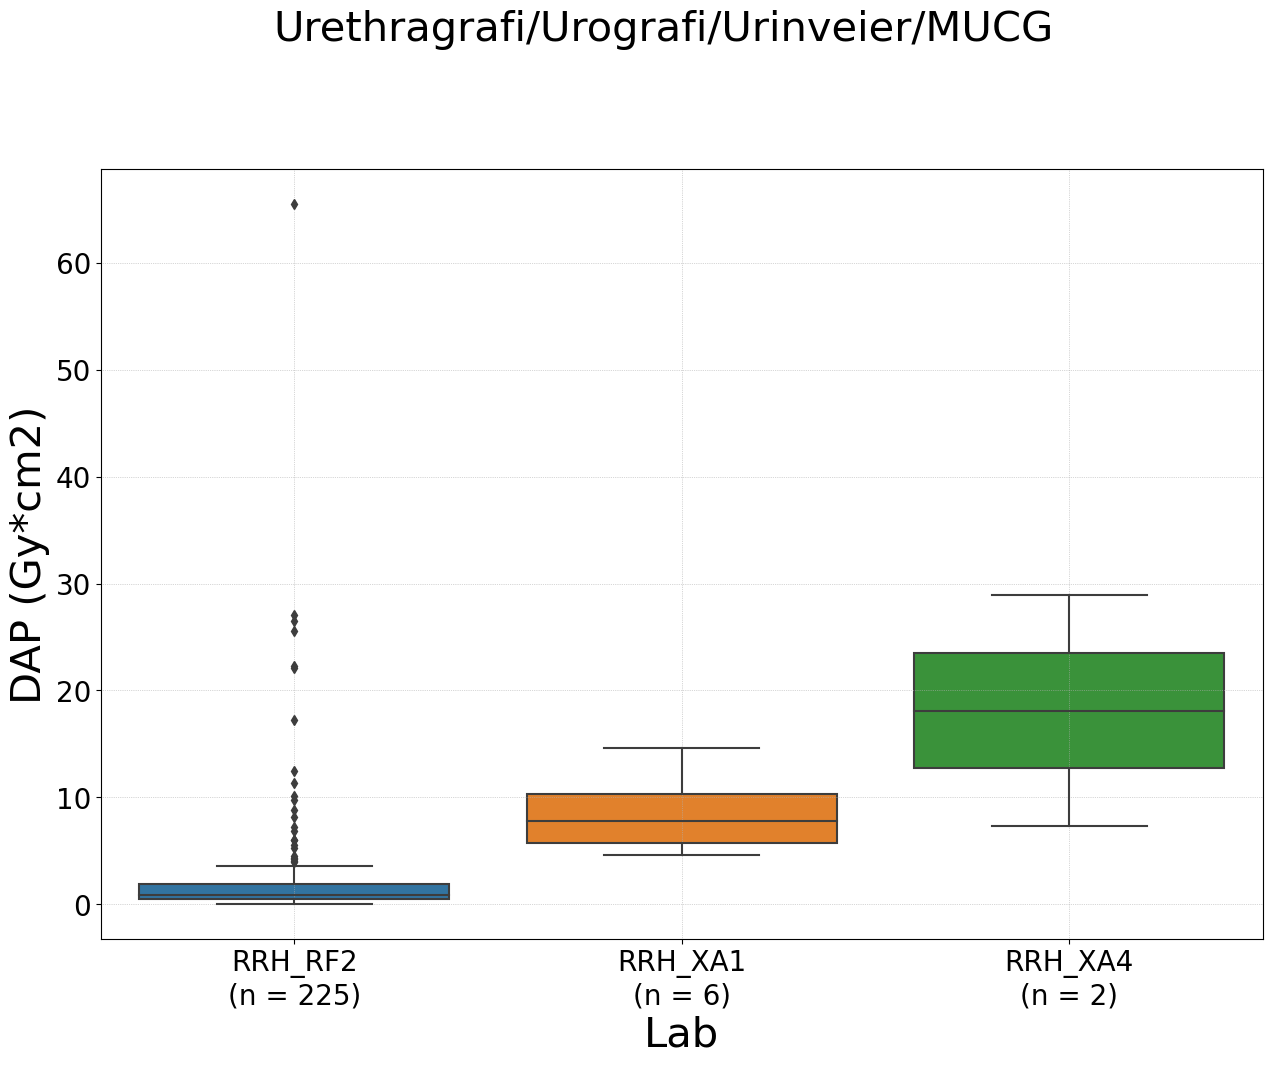

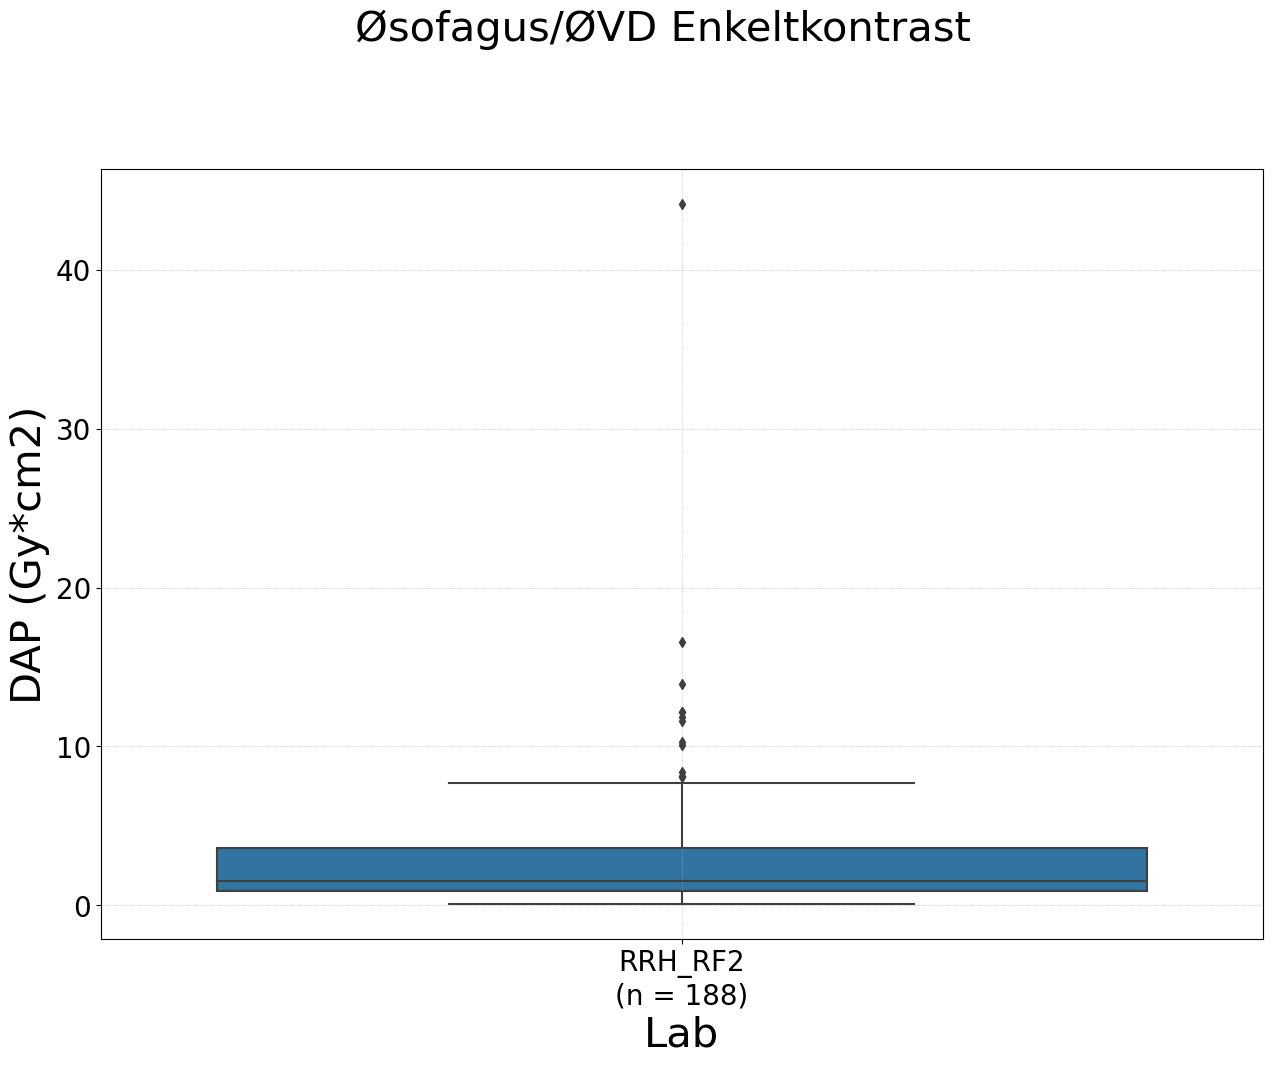

In [85]:
mapping_dict = rad_xa_dict.get_rad_xa_mapping_dict()
export = False
# Make a list of all the unique values in the mapping dictionary 
# (make list, convert to set, and make list again to remove duplicates):
procedures = list(set(list(mapping_dict.values())))
# Sort the list:
procedures.sort()
for p in procedures:
    bh_plot.plot_representative_dose(data, p, 0, export)

--------------------------------------------------




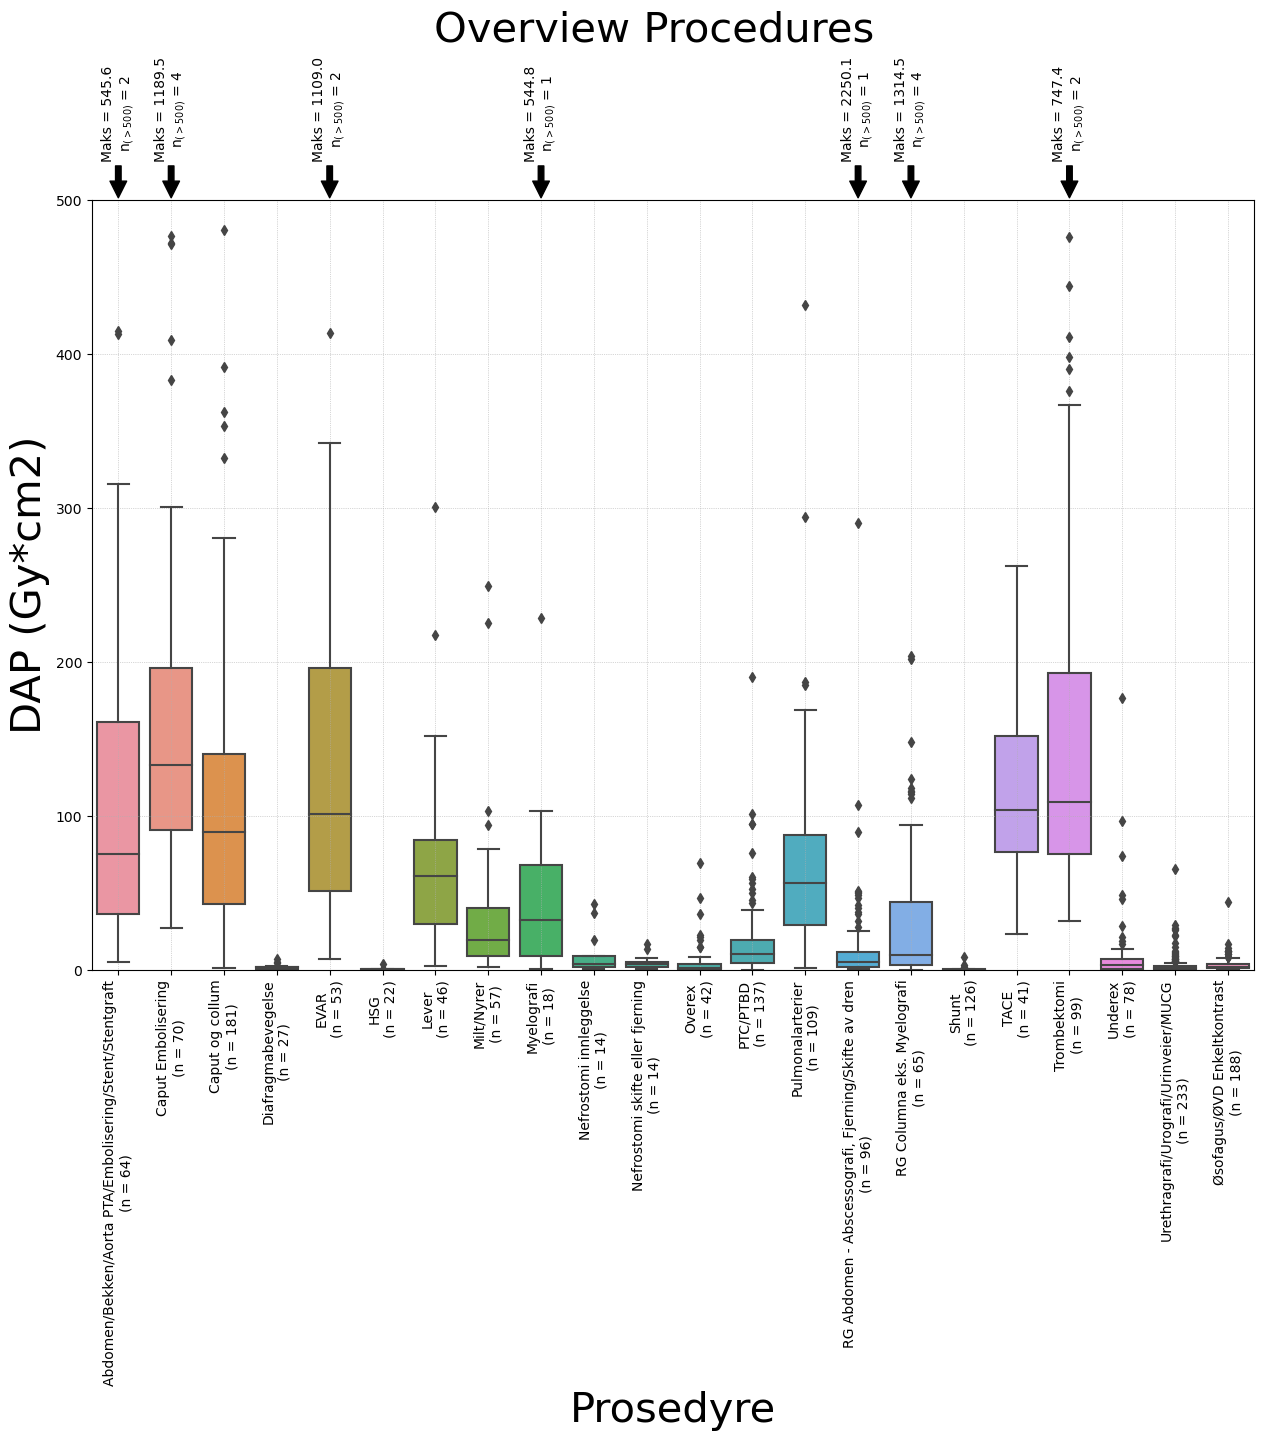

In [73]:
# Remove unmapped and cochlia examinations from the dataframe
elements_to_remove = ['Unmapped', 'Cochlia', 'Scoliose', 'TAVI']

mask = ~data['Mapped Procedures'].isin(elements_to_remove)
bh_plot.plot_representative_dose_by_procedure(data[mask], 500, export)

--------------------------------------------------




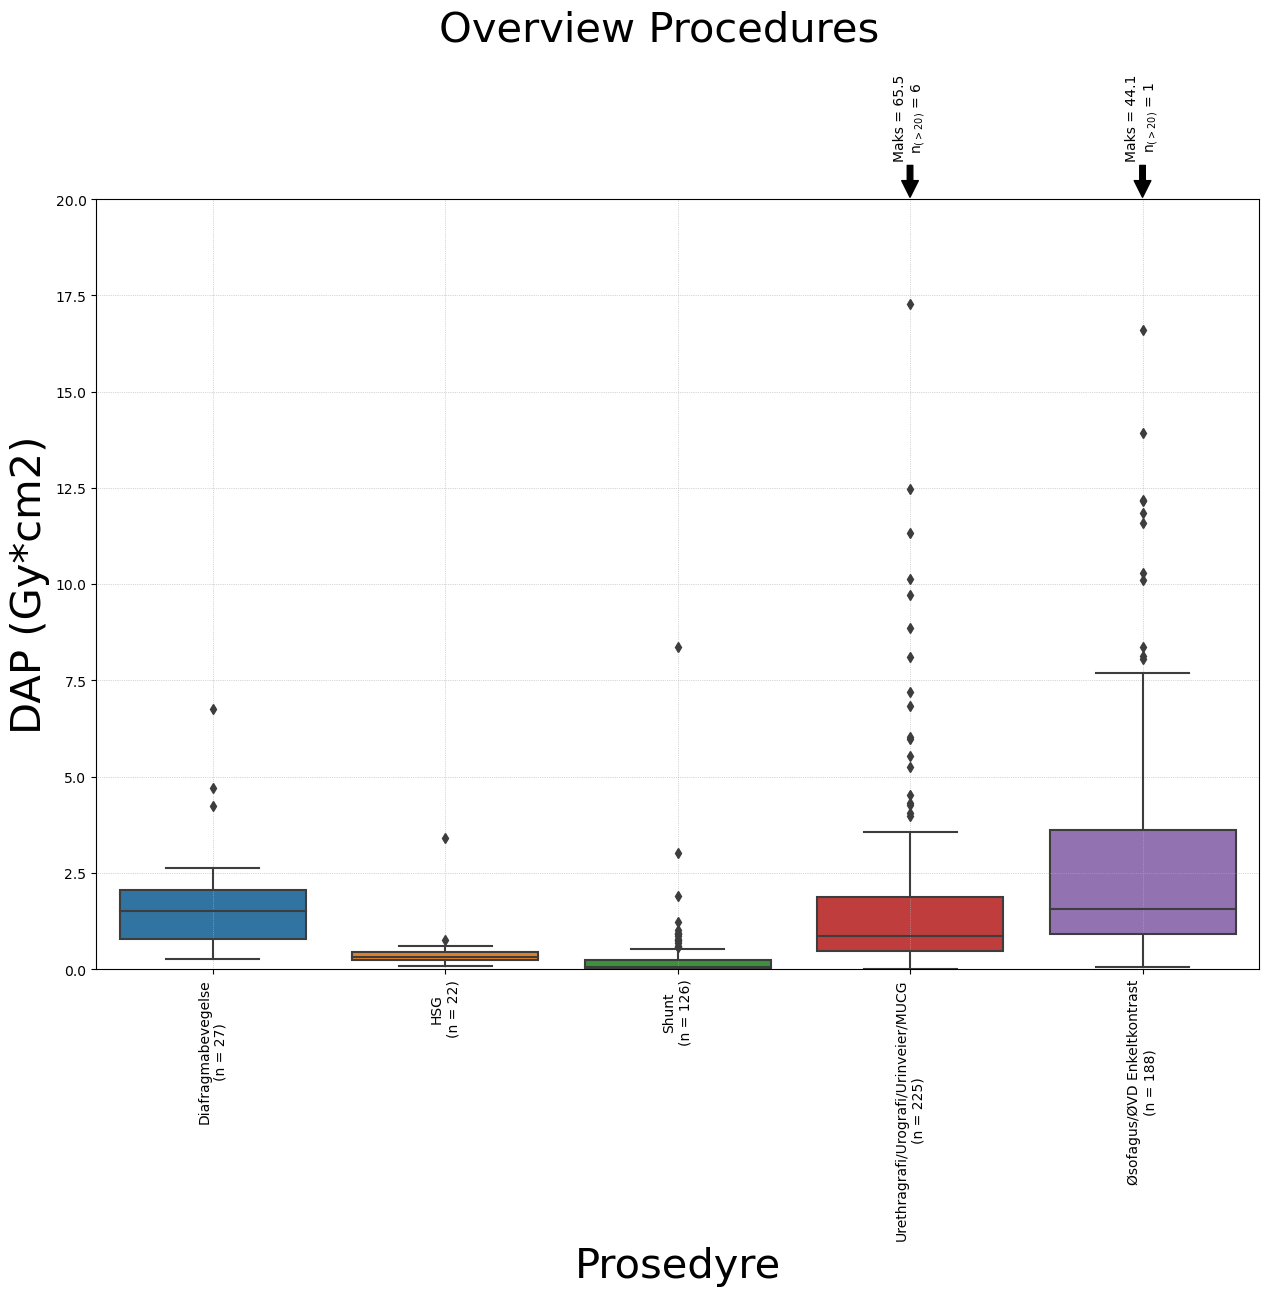

In [77]:
# Remove unmapped and cochlia examinations from the dataframe

data_rf2 = data[data['Modality Room'] == 'RRH_RF2']
elements_to_remove = ['Unmapped', 'Nefrostomi innleggelse', 'RG Abdomen - Abscessografi, Fjerning/Skifte av dren', 'RG Columna eks. Myelografi']

mask = ~data_rf2['Mapped Procedures'].isin(elements_to_remove)
bh_plot.plot_representative_dose_by_procedure(data_rf2[mask], 20, export)

--------------------------------------------------




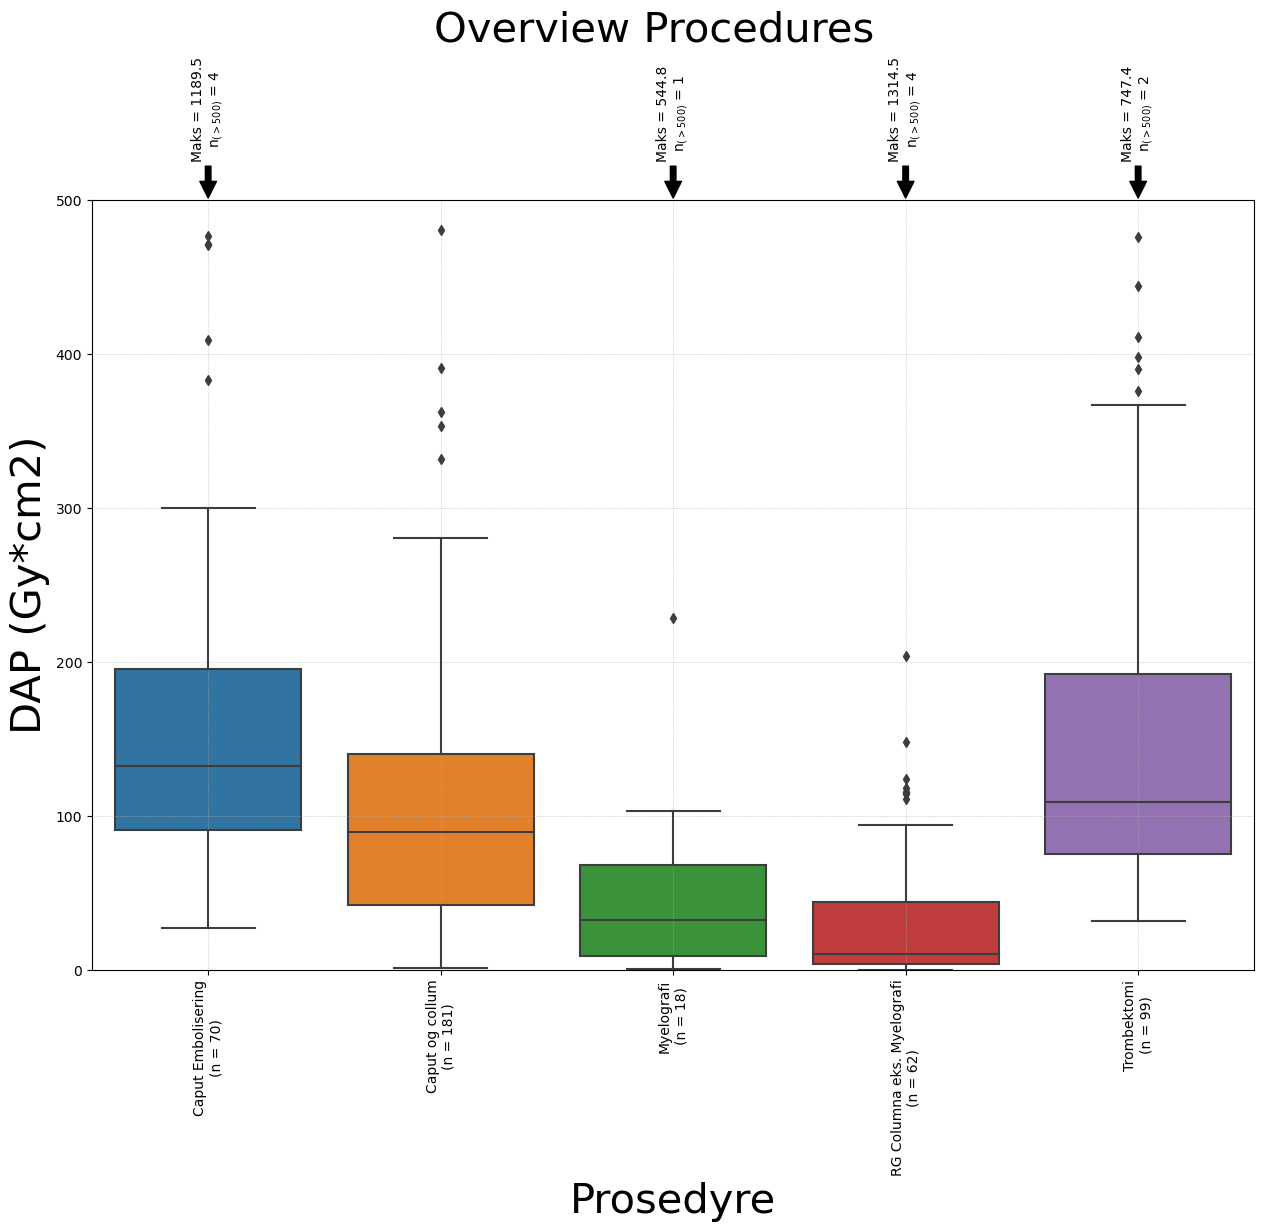

In [82]:
data_nevro = data[(data['Modality Room'] == 'RRH_XA2') | (data['Modality Room'] == 'RRH_XA4')]
elements_to_remove = ['Unmapped', 'Abdomen/Bekken/Aorta PTA/Embolisering/Stent/Stentgraft',
                      'EVAR', 'Lever', 'Milt/Nyrer', 'Nefrostomi innleggelse', 'Nefrostomi skifte eller fjerning',
                      'Overex', 'PTC/PTBD', 'Pulmonalarterier', 'RG Abdomen - Abscessografi, Fjerning/Skifte av dren',
                      'TACE', 'Underex', 'Urethragrafi/Urografi/Urinveier/MUCG']

mask = ~data_nevro['Mapped Procedures'].isin(elements_to_remove)
bh_plot.plot_representative_dose_by_procedure(data_nevro[mask], 500, export)

In [102]:
procedure = 'Trombektomi'
lab = 'RRH_XA2'
# Get median f+A time for the procedure:
median_fa_time = data[(data['Mapped Procedures'] == procedure) & (data['Modality Room'] == lab)]['F+A Time (s)'].median()
print('Median f+A time for ' + procedure + 'on lab ' + lab + ' is ' + str(median_fa_time/60) + ' minutes.')

Median f+A time for Trombektomi is 27.746758333333332 minutes.


In [ ]:
bh_utils.export_examination_codes_to_text_file(data)

In [ ]:
bh_utils.delete_reports(True)